TASK:
per ogni topic, per ogni candidato, applicare la sentiment analysis (SA) sui tweet di quel candidato <br>
    - sentimenti (positive, negative, neutral) <br>
    - emozioni <br>

Candidati usati:
- Williamson + Biden per i Democratici (@marwilliamson,@POTUS)
- DeSantis + Haley per i Repubblicani (@RonDeSantis, @NikkiHaley).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def get_chart_sentiment(df,topic, topic_name, username, full_name, party):
    #Count sentiment in data for specific topic and candidate
    df_topic = df[df['first_topic'] == topic]
    df_topic = df_topic[df_topic['username'] == username]
    
    #count sentiments
    sentiment = df_topic['sentiment'].value_counts()
    sentiment = sentiment.reindex(['neutral', 'negative', 'positive'], fill_value=0) #Ordering how I want them
    n_positive = sentiment.get('positive', 0)
    n_negative = sentiment.get('negative', 0)   
    n_neutral = sentiment.get('neutral', 0)
    tot = str(n_positive + n_negative + n_neutral)
    
    
    #Plotting
    colors = ['grey', 'lightcoral', 'lightgreen']
    fig = plt.figure(figsize=(10,6))
    bars = plt.bar(sentiment.index, sentiment.values, color=colors)
    plt.title('Sentiment Analysis for ' + topic_name + ' [t:'+str(topic)+'] of ' + full_name + ' (' + party + ')', fontweight='bold', fontsize = 10)
    plt.xlabel('Sentiment', fontweight='bold')
    plt.ylabel('Number of tweets - tot:' + tot, fontweight='bold')
    for bar, count in zip(bars, sentiment.values):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05 , str(count), ha='center', va='bottom', color='black', fontweight='bold')

    if max(sentiment.values) < 10:
        plt.ylim(top=max(sentiment.values) + 1) #little bit of space on top
    else:
        plt.ylim(top=max(sentiment.values) + 8)
   
    plt.show()
    
    
    #Saving
    topic_name_safe = topic_name.replace('/', '-') #Non posso tenere / nel percorso
    title = 'sentiment_'+full_name + '_' + topic_name_safe
    fig.savefig('./result sentimental analysis/X_candidates/'+title+'.png', dpi=300, bbox_inches='tight')
    
    #Create csv
    #df_topic = df_topic.sort_values(by=['emotion']) #ordino per emozione
    destination = './result sentimental analysis/X_candidates_csv/'+full_name +'_'+ topic_name_safe +'_t_'+ str(topic) +'.csv'
    df_topic.to_csv(destination, index=False, header=True)
    
    return tot

In [3]:
def get_chart_emotion(df,topic, topic_name, username, full_name, party):
    all_emotions = ['anger', 'optimism', 'anticipation', 'joy', 'disgust', 'fear', 'sadness', 'surprise', 'love', 'pessimism', 'trust']
   
    df_topic = df[df['first_topic'] == topic]
    df_topic = df_topic[df_topic['username'] == username]

    #count
    emotion = df_topic['emotion'].value_counts()
    emotion = emotion.reindex(all_emotions, fill_value=0) #Ordering how I want them
    tot = emotion.sum()


    colors = plt.cm.tab10(np.linspace(0, 1, len(emotion)))
    fig = plt.figure(figsize=(15, 6))
    bars = plt.bar(emotion.index, emotion.values, color=colors)

    plt.title('Emotion Analysis for ' + topic_name + ' [t:'+str(topic)+'] of ' + full_name + ' (' + party + ')', fontweight='bold', fontsize = 10)
    plt.xlabel('Emotion', fontweight='bold')
    plt.ylabel('Number of tweets - tot:' + str(tot), fontweight='bold')
  

    # Add exact numbers on top of the bars
    for bar, count in zip(bars, emotion.values):
        plt.text(bar.get_x() + bar.get_width() / 2 , bar.get_height() + 0.05, str(count), ha='center', va='bottom', color='black', fontweight='bold')

    
    plt.ylim(top=max(emotion.values) + 8) #little bit of space on top
    plt.show()
    
    #Saving
    topic_name_safe = topic_name.replace('/', '-') #Non posso tenere / nel percorso
    title = 'emotion_'+full_name + '_' + topic_name_safe
    fig.savefig('./result sentimental analysis/X_candidates/'+title+'.png', dpi=300, bbox_inches='tight')
    return tot

In [4]:
candidates = {
    # democratici
    "marwilliamson": ("Marianne Williamson", "democratic"),
    "POTUS": ("Joe Biden", "democratic"),
    
    # repubblicani
    "NikkiHaley": ("Nikki Haley", "republican"),
    "RonDeSantis": ("Ron De Santis", "republican"),  
}

topics = {
    1: "American/economics/health",
    2: "War",
    3: "News/radio/livestream",
    4: "Republicans vs democrats",
    5: "Border/community/family",
    6: "Election/debate",
    7: "Abortion/rights/guns",
    8: "Infrastructure/job/energy",
}

In [5]:
source = "../doc/sentiment_analysis_all.csv" #documento iniziale
df = pd.read_csv(source)

Candidate:  marwilliamson with topic:  1


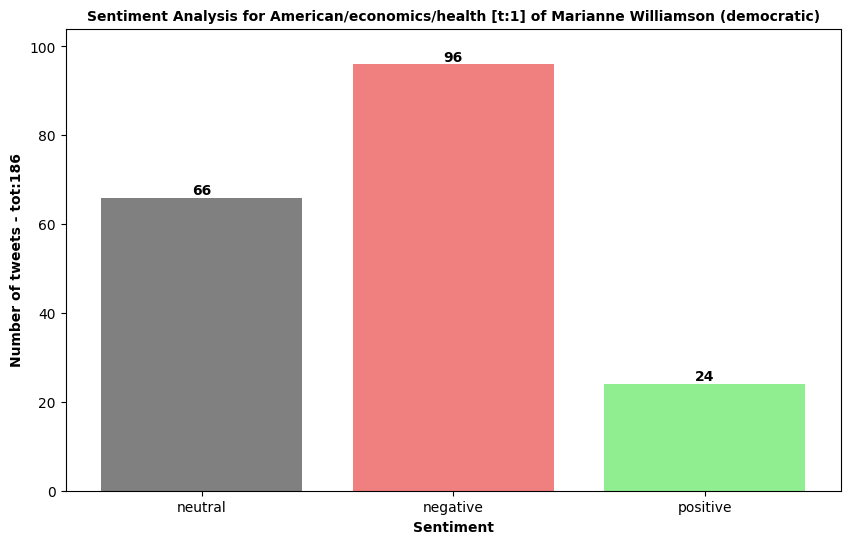

Candidate:  marwilliamson with topic:  2


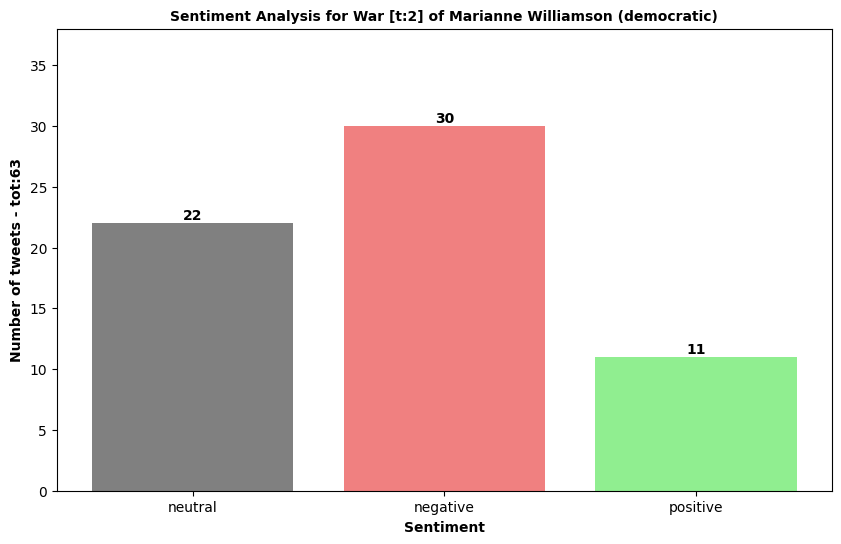

Candidate:  marwilliamson with topic:  3


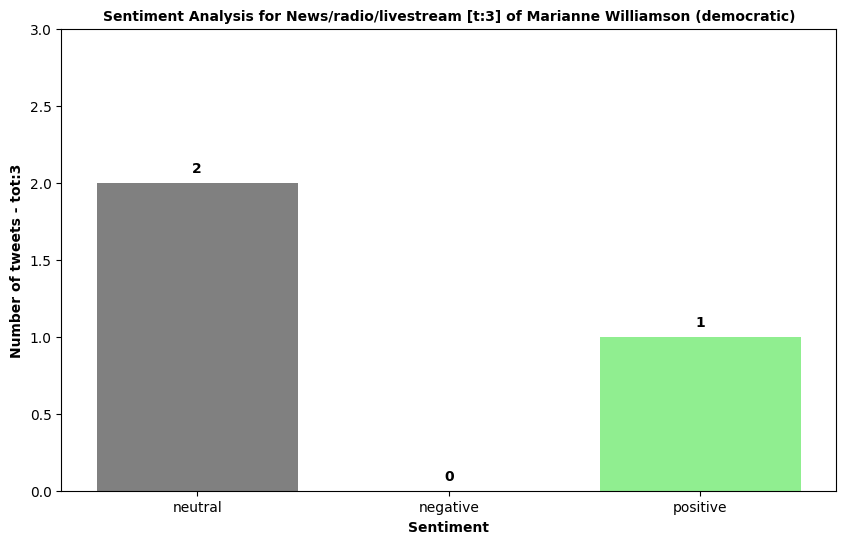

Candidate:  marwilliamson with topic:  4


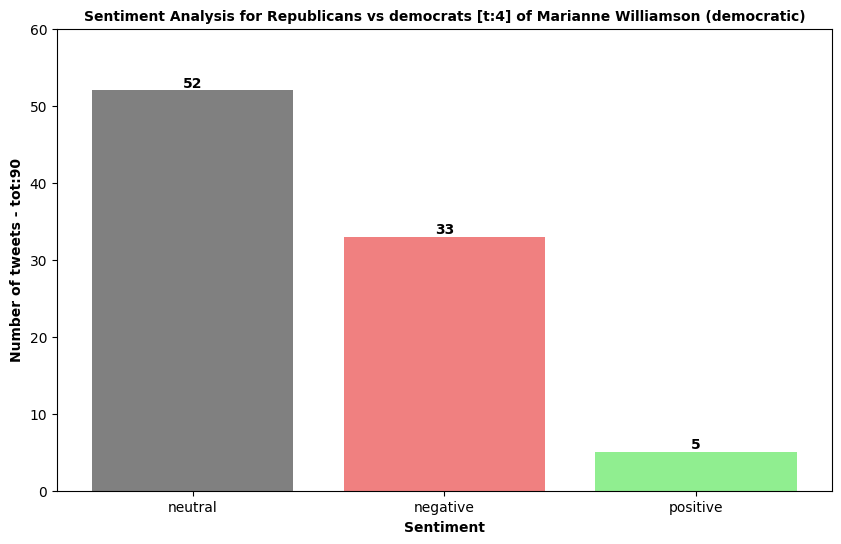

Candidate:  marwilliamson with topic:  5


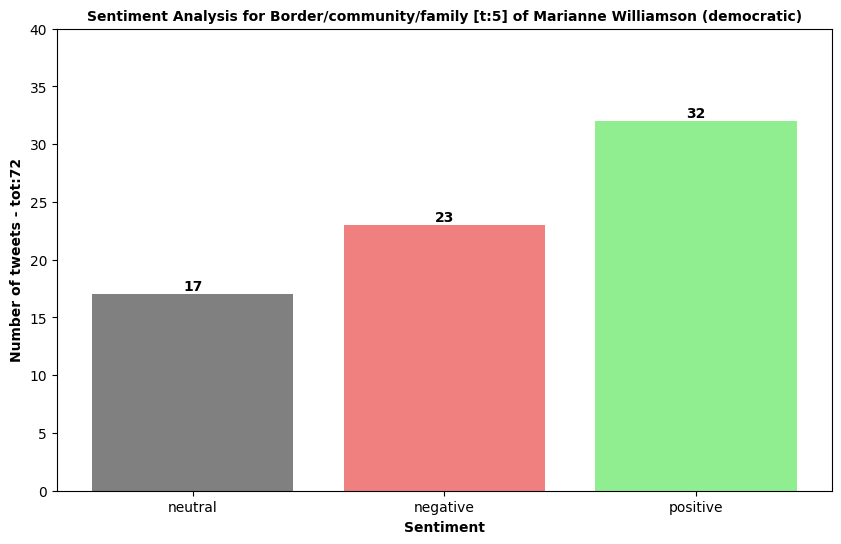

Candidate:  marwilliamson with topic:  6


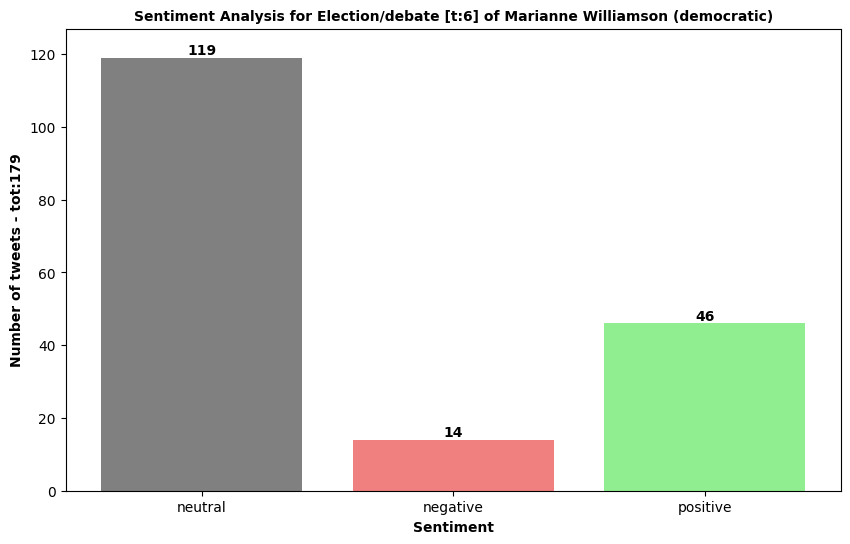

Candidate:  marwilliamson with topic:  7


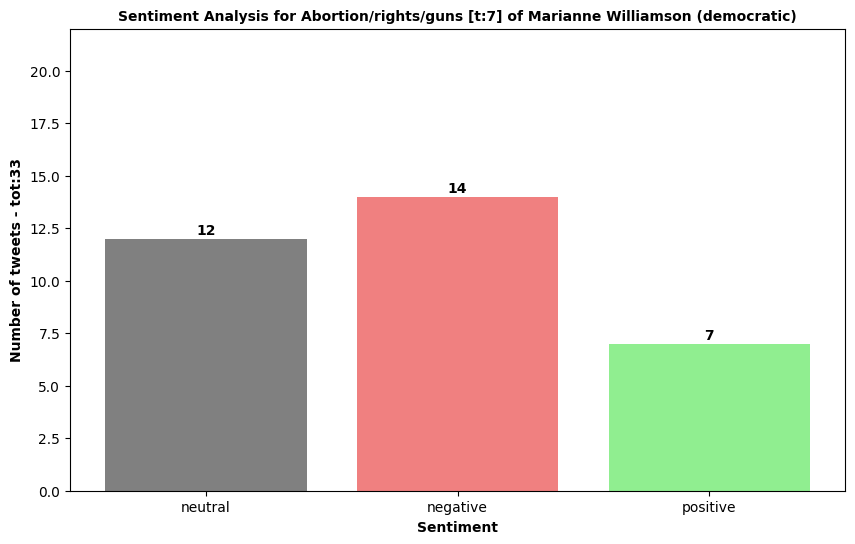

Candidate:  marwilliamson with topic:  8


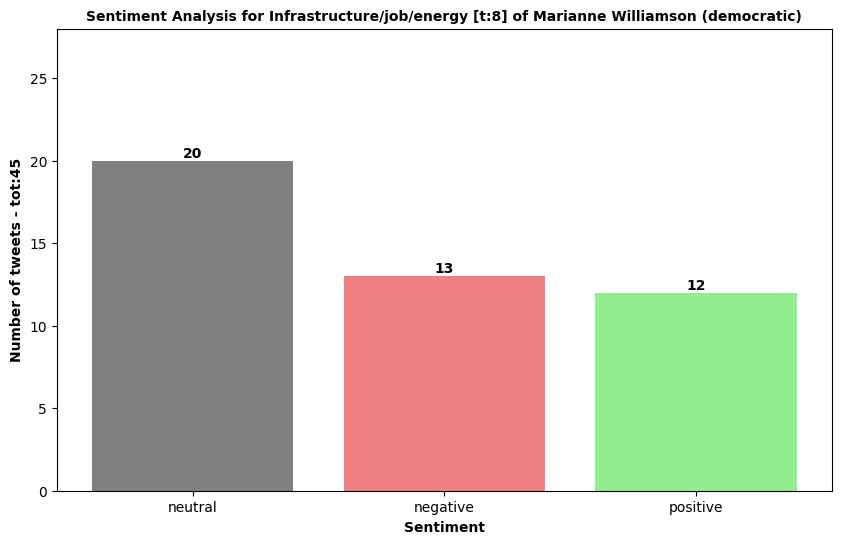

Total tweets for candidate:  671
Candidate:  POTUS with topic:  1


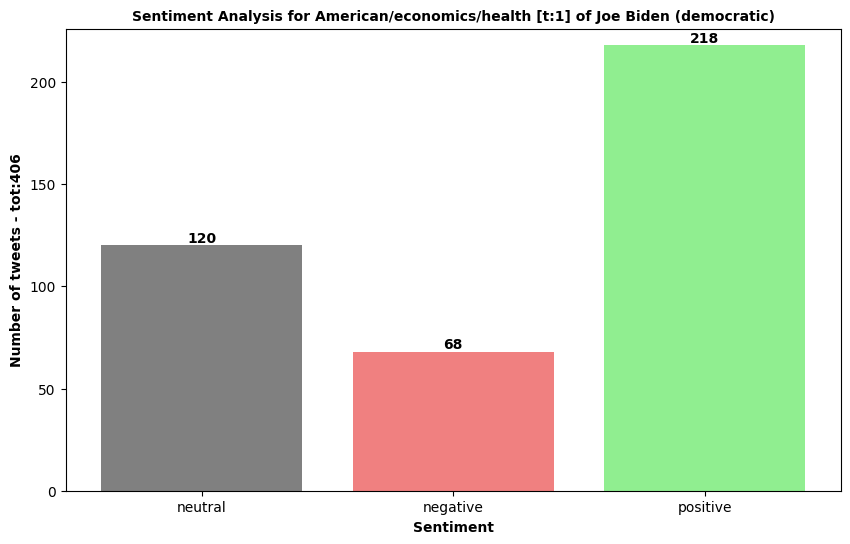

Candidate:  POTUS with topic:  2


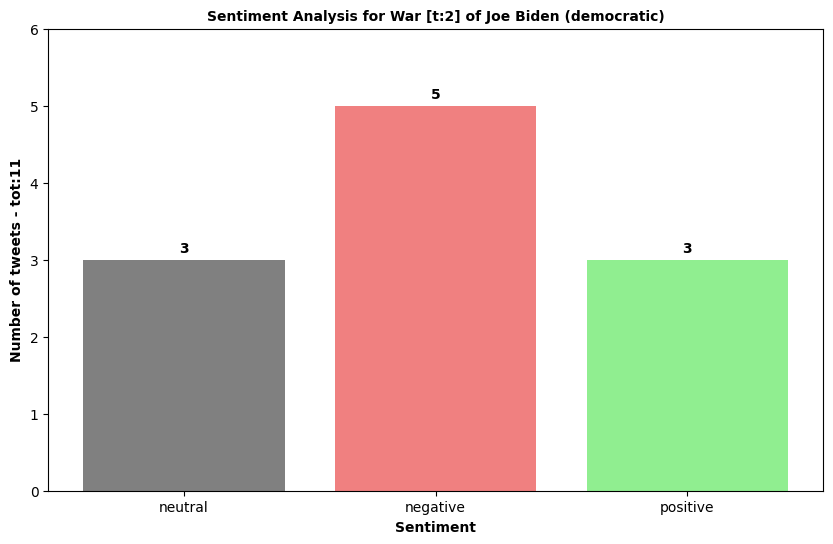

Candidate:  POTUS with topic:  3


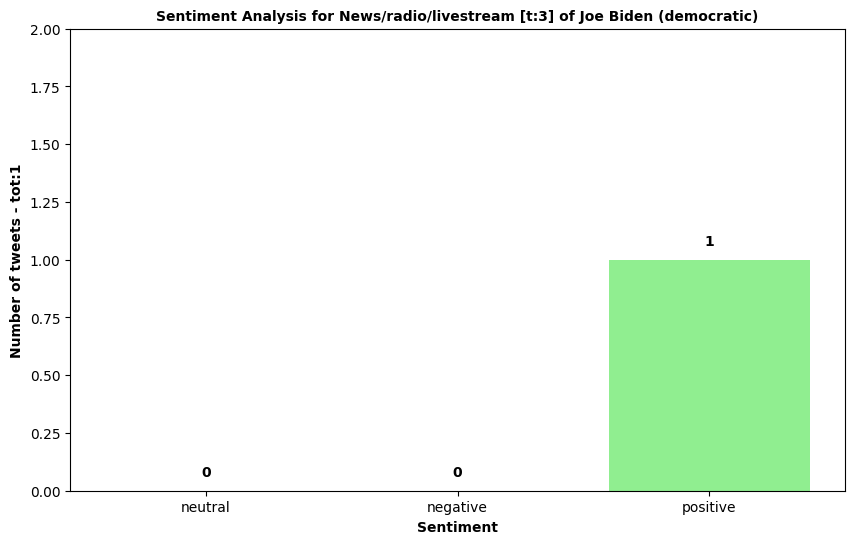

Candidate:  POTUS with topic:  4


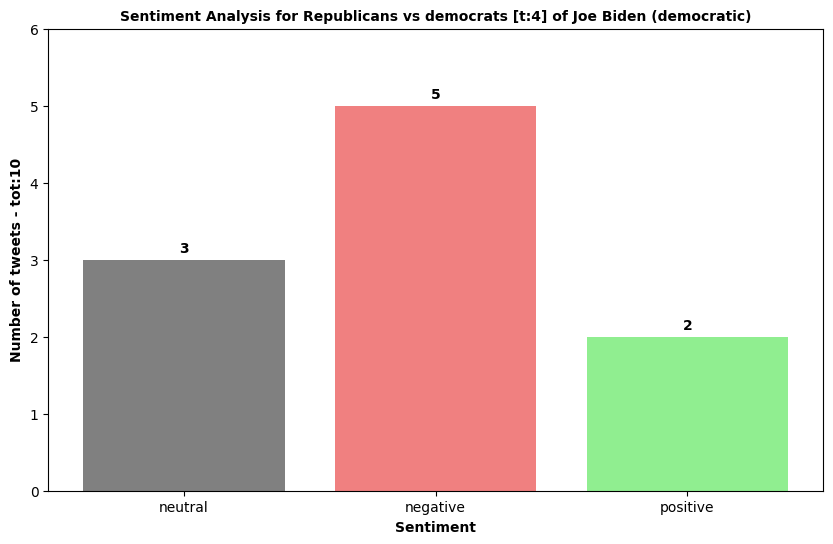

Candidate:  POTUS with topic:  5


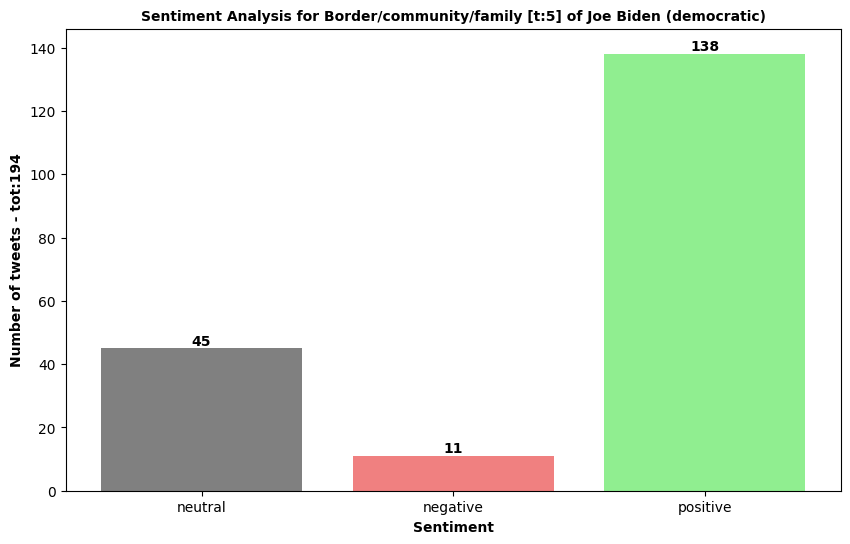

Candidate:  POTUS with topic:  6


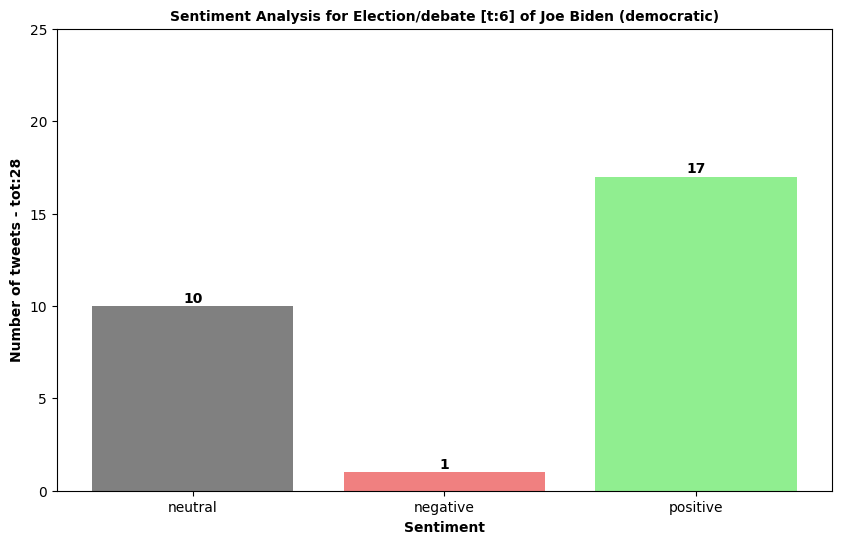

Candidate:  POTUS with topic:  7


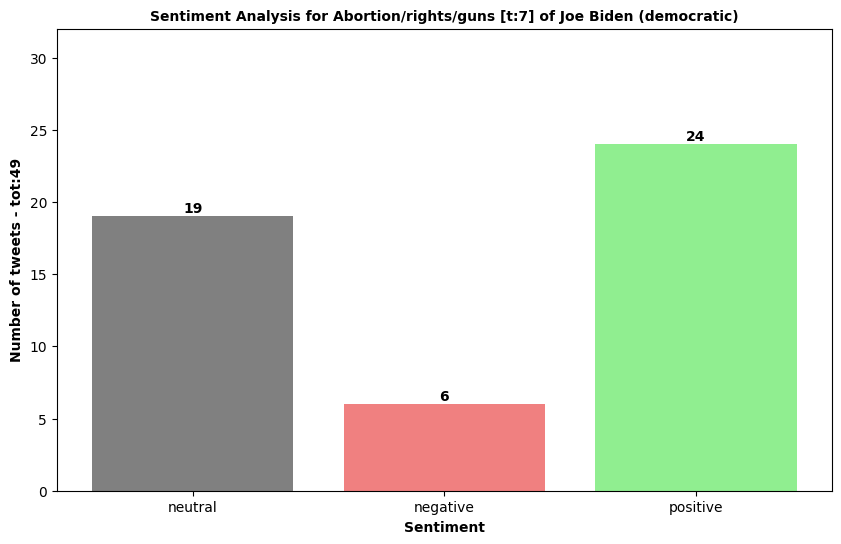

Candidate:  POTUS with topic:  8


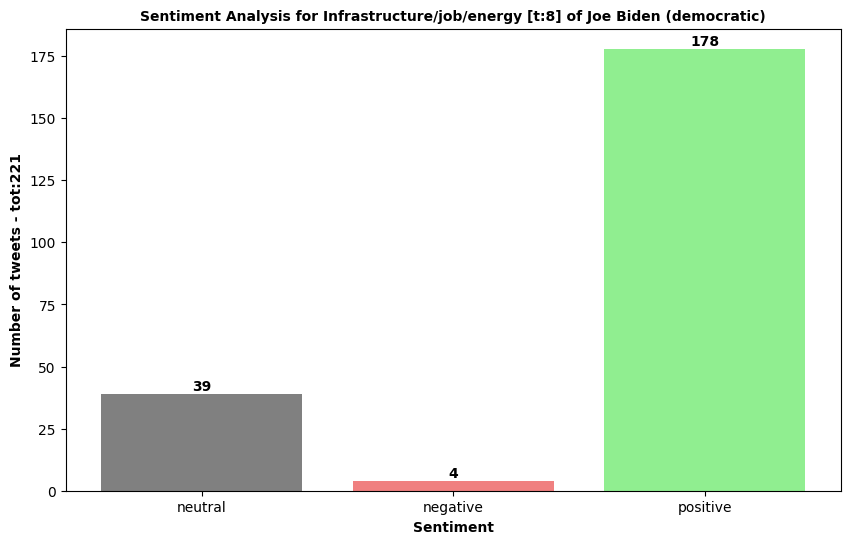

Total tweets for candidate:  920
Candidate:  NikkiHaley with topic:  1


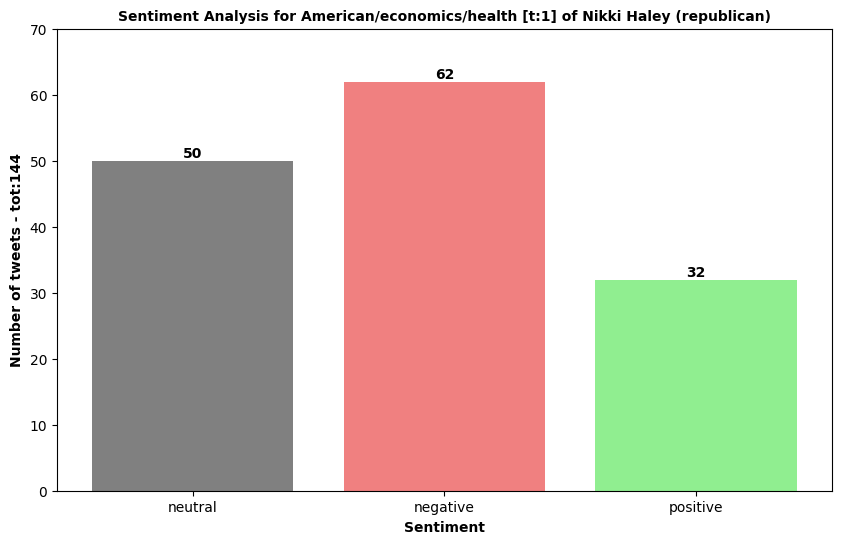

Candidate:  NikkiHaley with topic:  2


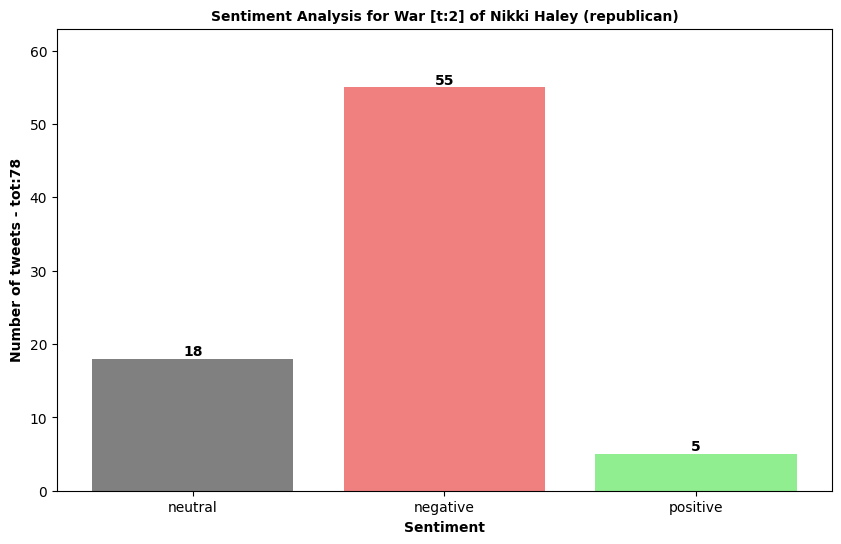

Candidate:  NikkiHaley with topic:  3


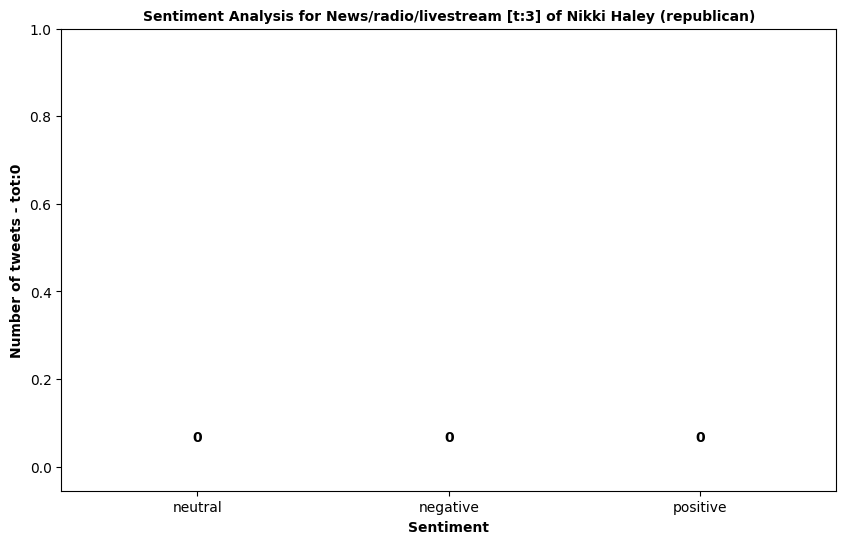

Candidate:  NikkiHaley with topic:  4


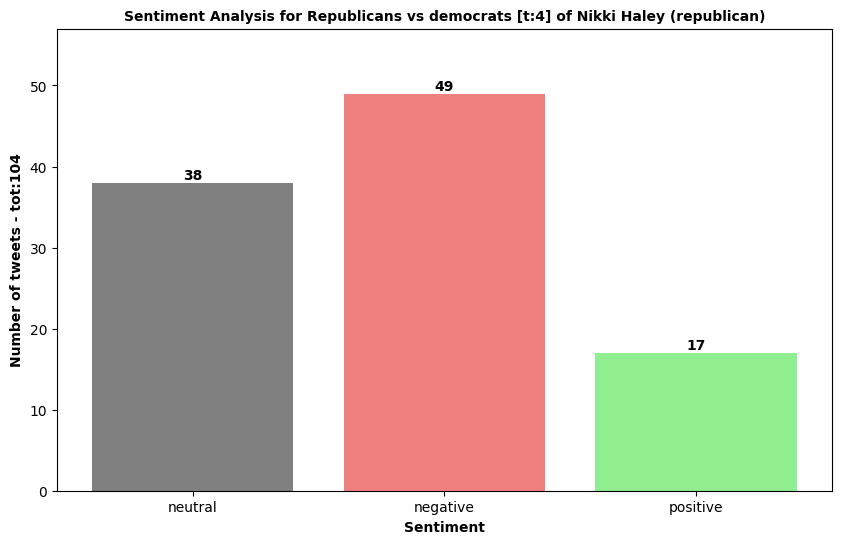

Candidate:  NikkiHaley with topic:  5


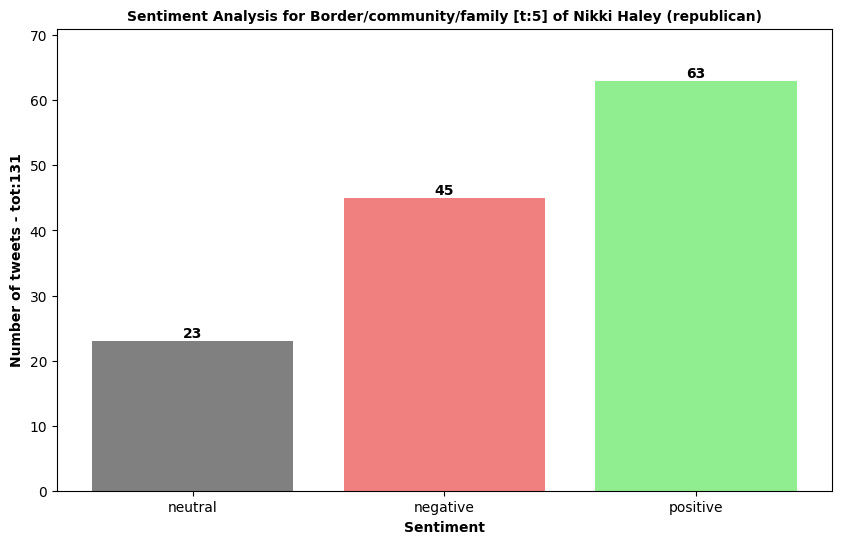

Candidate:  NikkiHaley with topic:  6


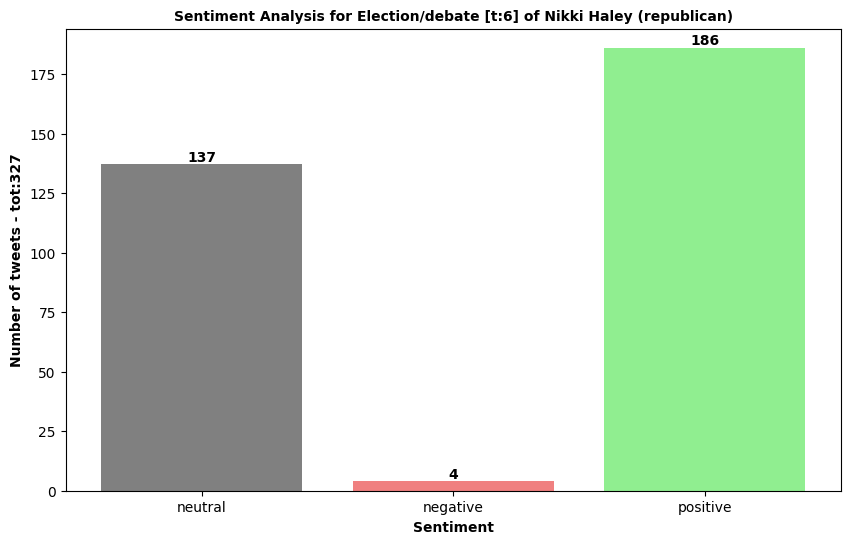

Candidate:  NikkiHaley with topic:  7


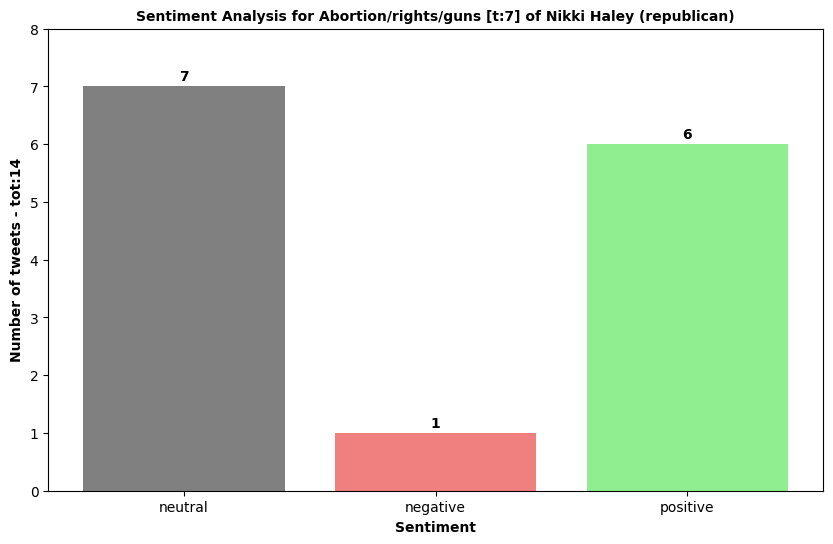

Candidate:  NikkiHaley with topic:  8


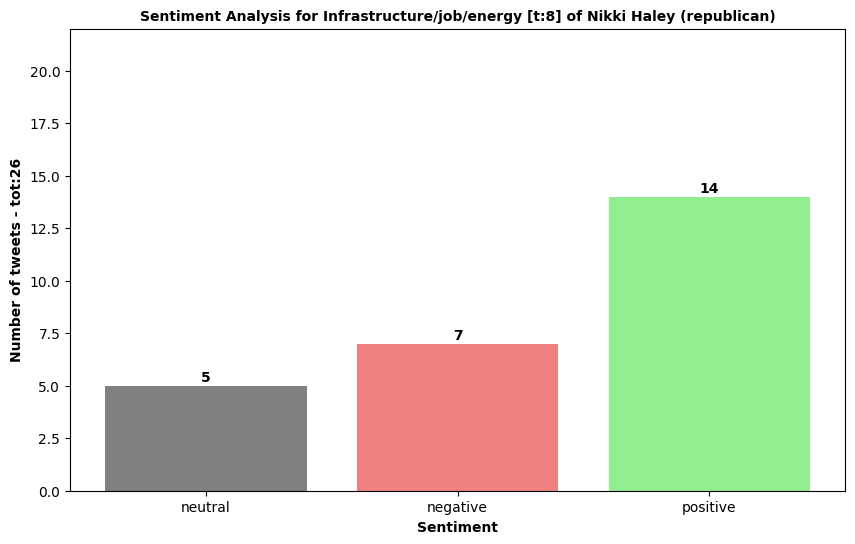

Total tweets for candidate:  824
Candidate:  RonDeSantis with topic:  1


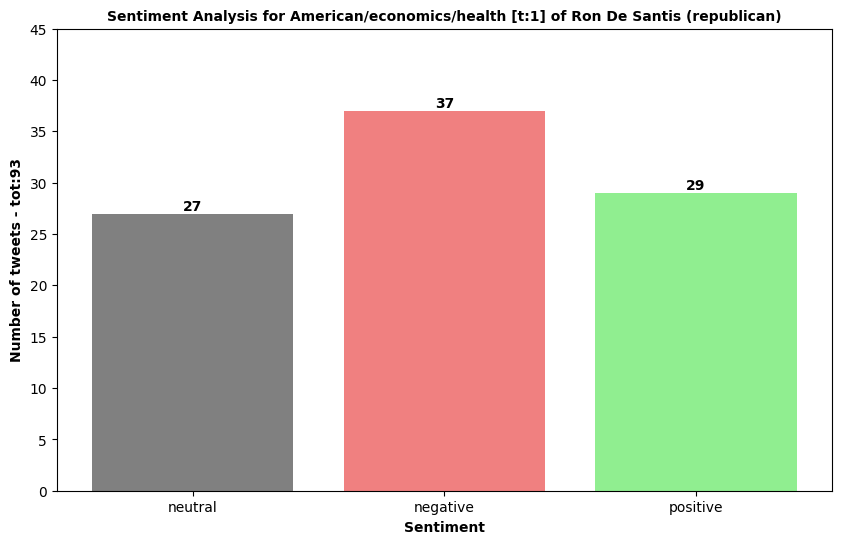

Candidate:  RonDeSantis with topic:  2


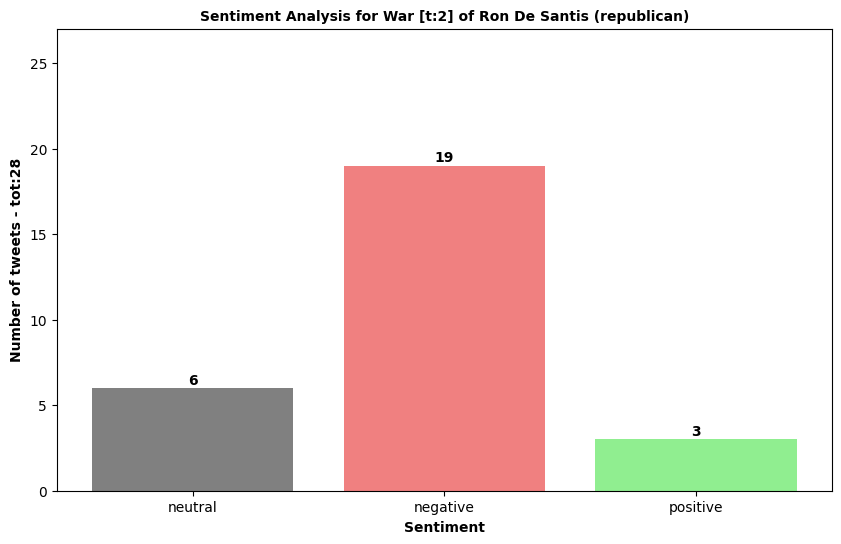

Candidate:  RonDeSantis with topic:  3


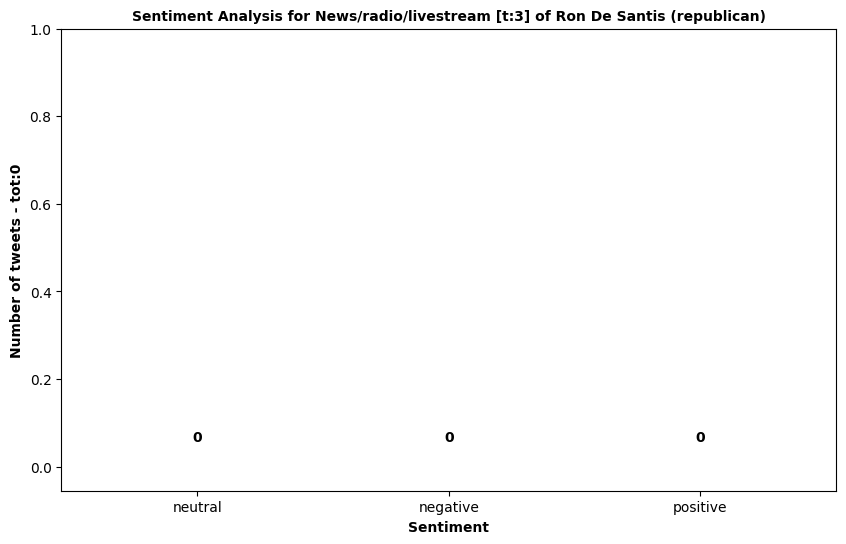

Candidate:  RonDeSantis with topic:  4


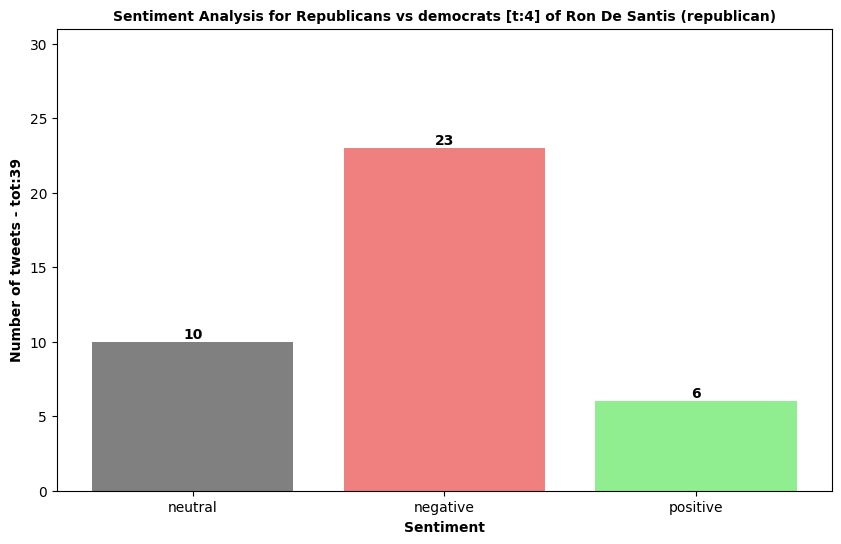

Candidate:  RonDeSantis with topic:  5


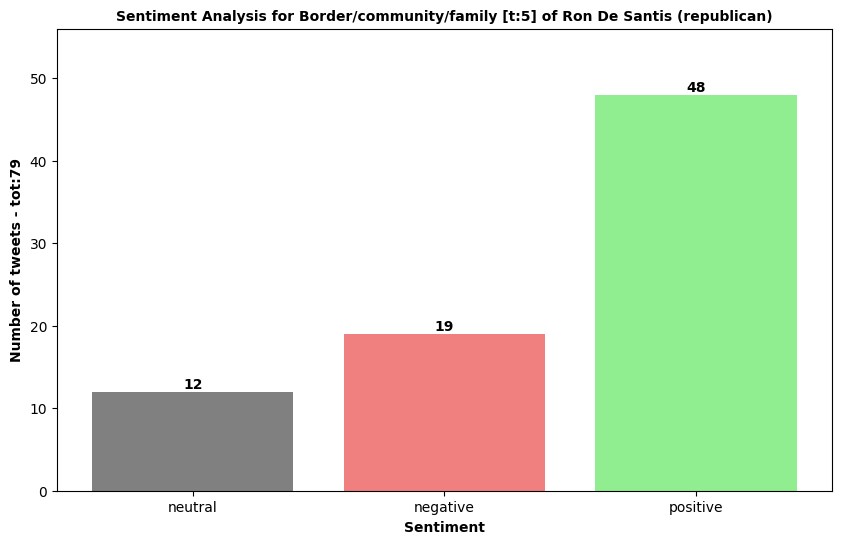

Candidate:  RonDeSantis with topic:  6


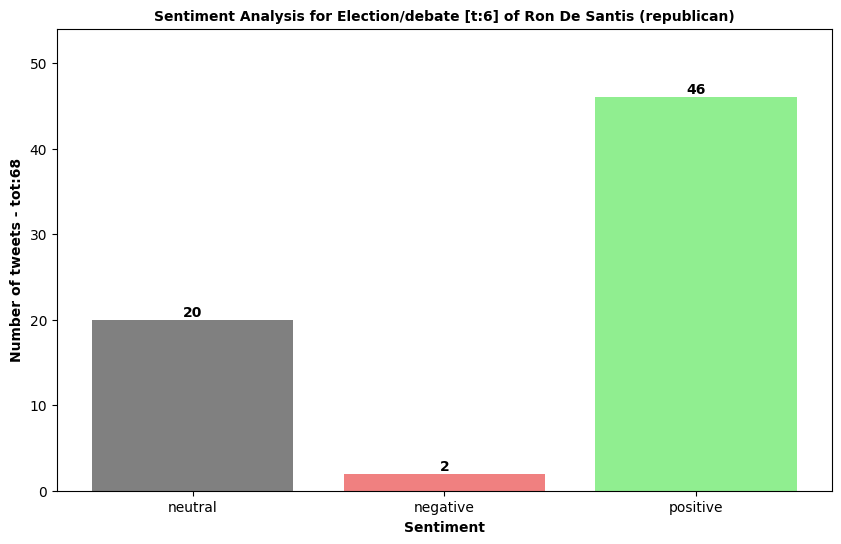

Candidate:  RonDeSantis with topic:  7


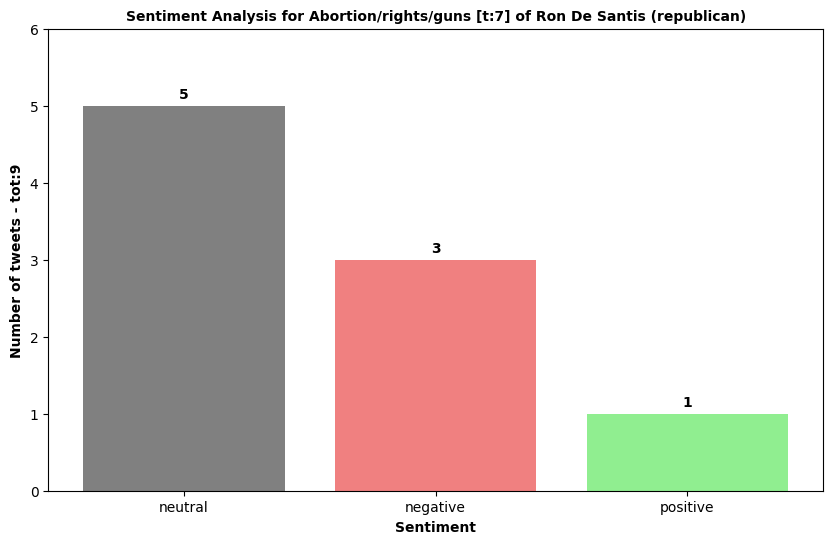

Candidate:  RonDeSantis with topic:  8


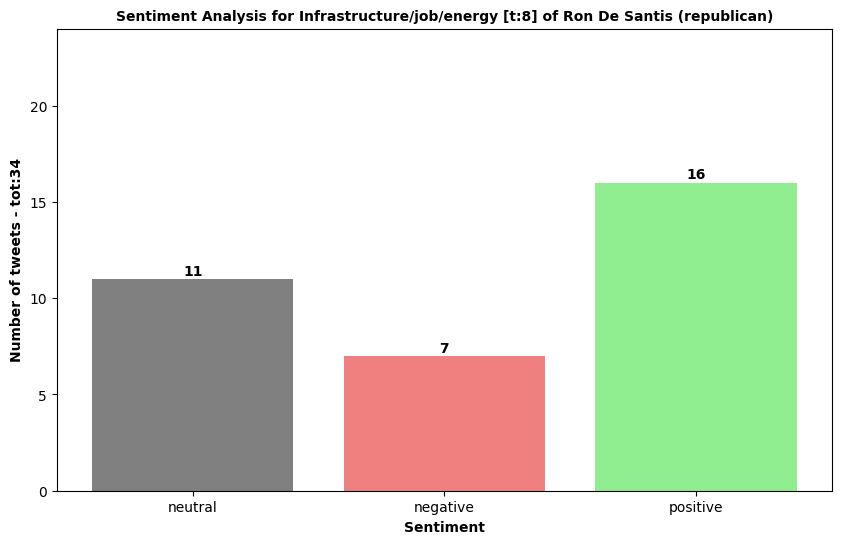

Total tweets for candidate:  350


In [6]:
#SENTIMENT ANALYSIS
for candidate in candidates:
    tot_candidate = 0
    for topic in topics:
        print("Candidate: ", candidate, "with topic: ", topic)
        tot = get_chart_sentiment(df, topic, topics[topic], candidate, candidates[candidate][0], candidates[candidate][1])
        tot_candidate = tot_candidate + int(tot)
       
    print("Total tweets for candidate: ", tot_candidate)

Candidate:  marwilliamson with topic:  1


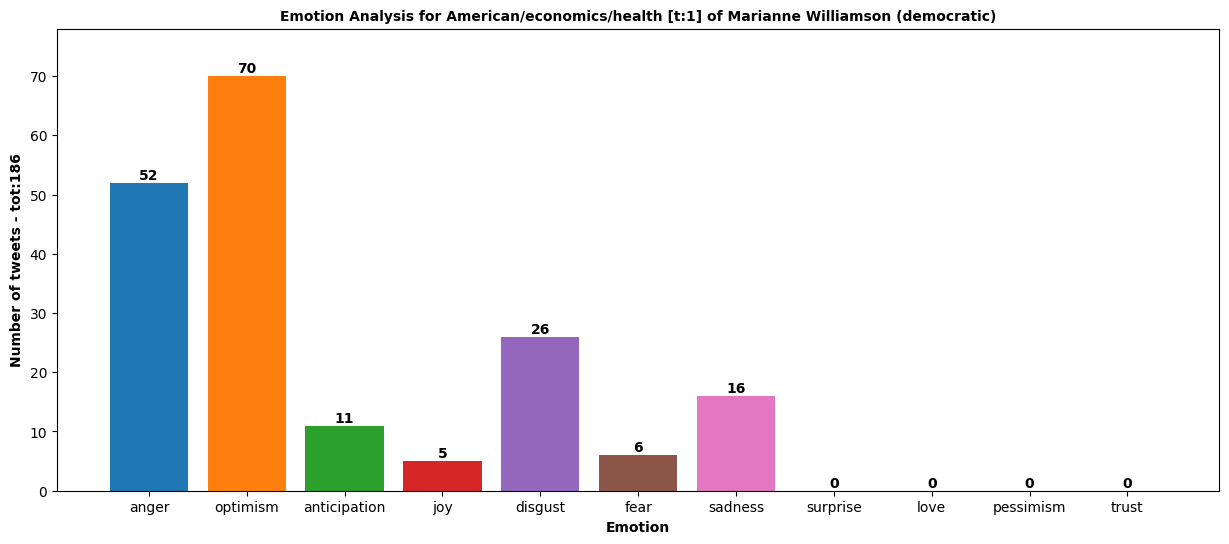

Candidate:  marwilliamson with topic:  2


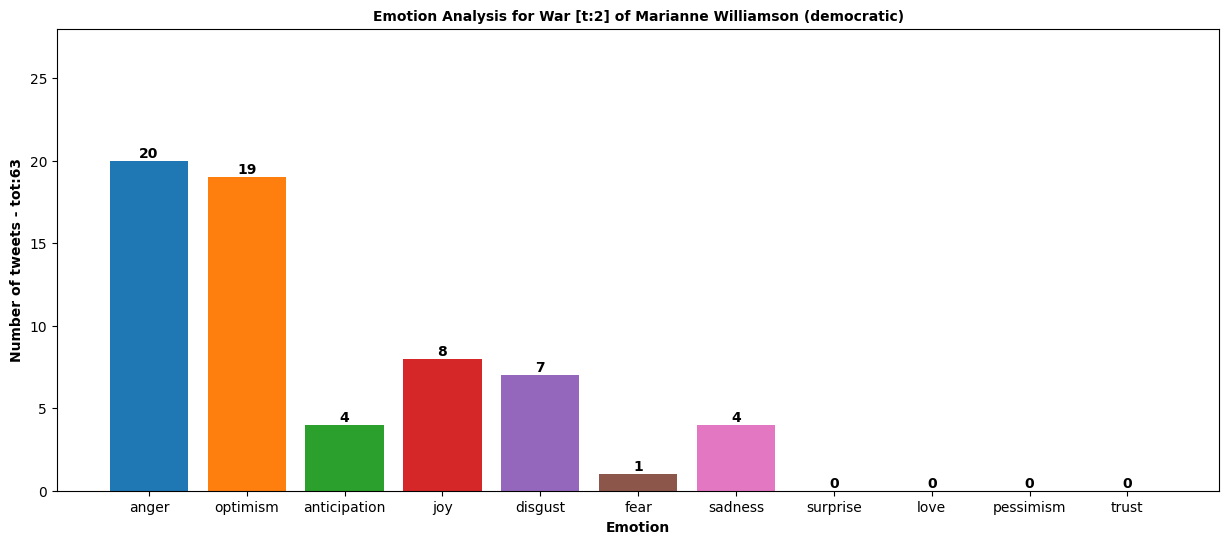

Candidate:  marwilliamson with topic:  3


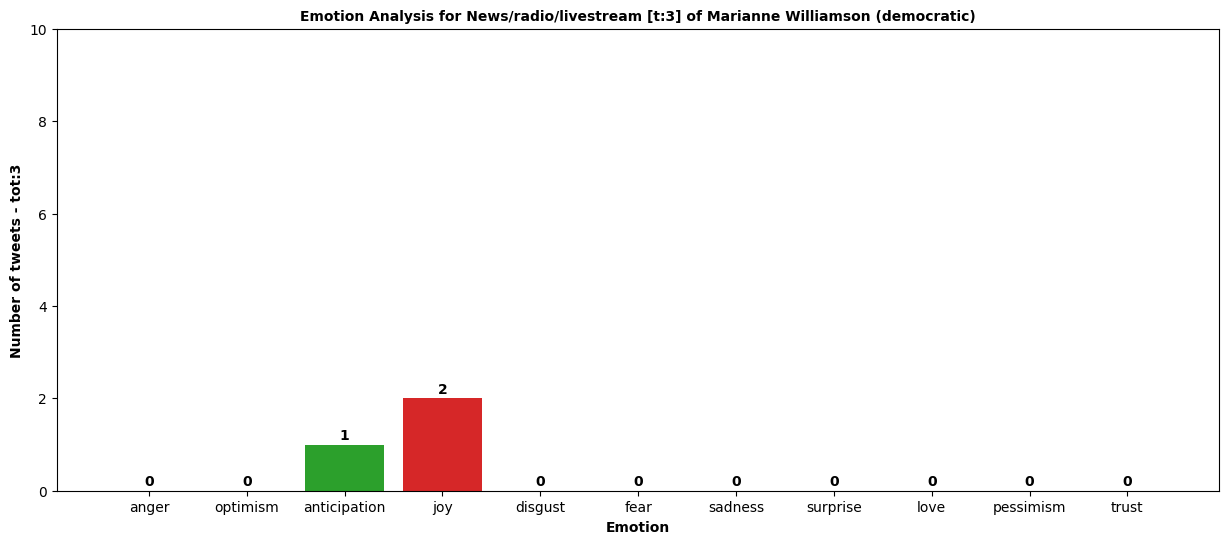

Candidate:  marwilliamson with topic:  4


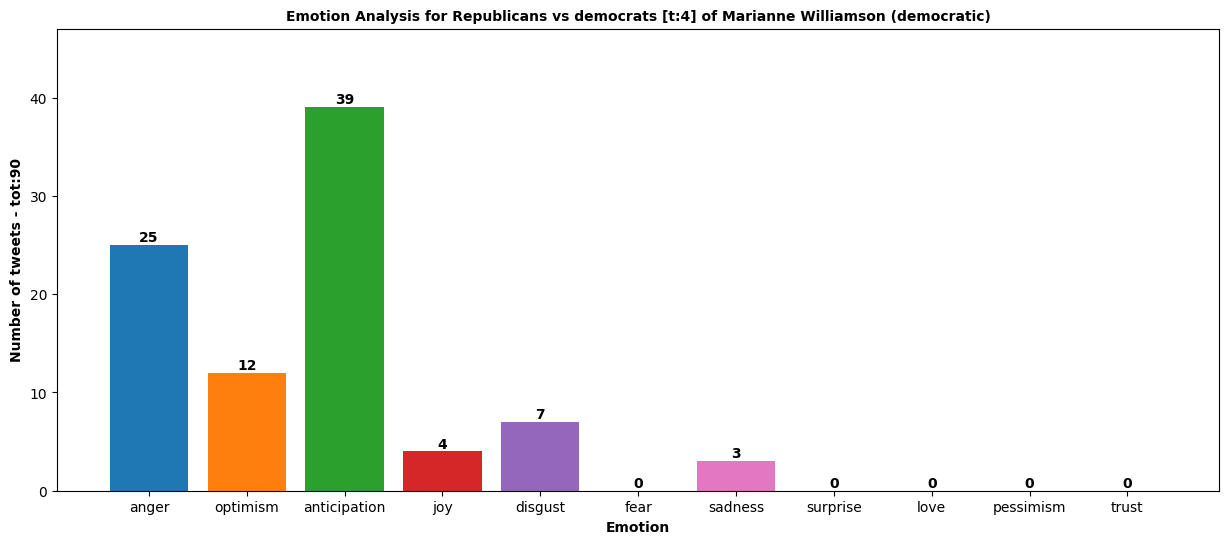

Candidate:  marwilliamson with topic:  5


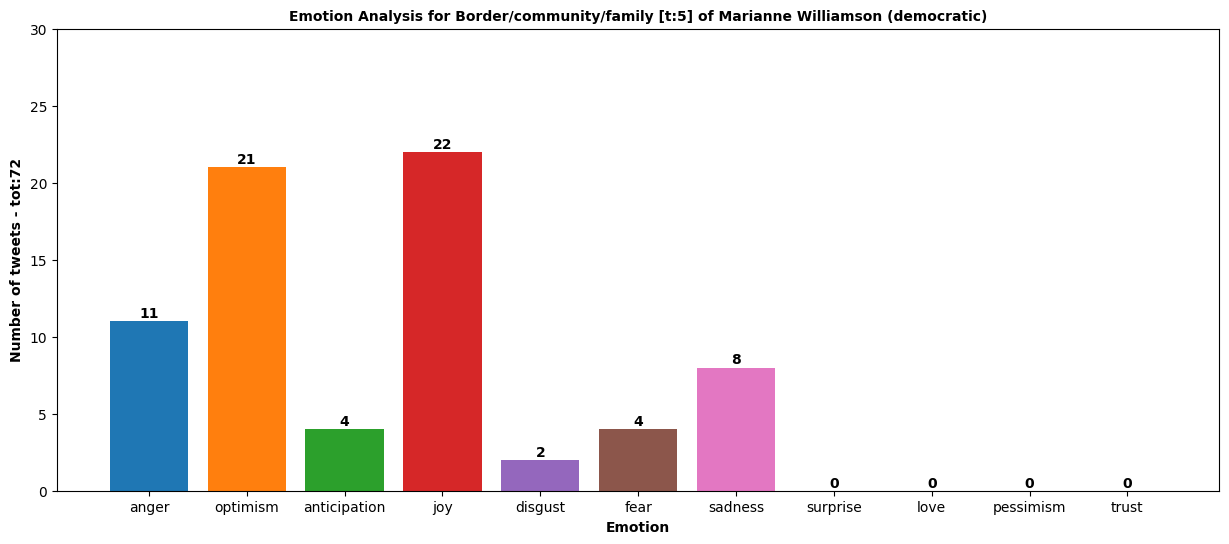

Candidate:  marwilliamson with topic:  6


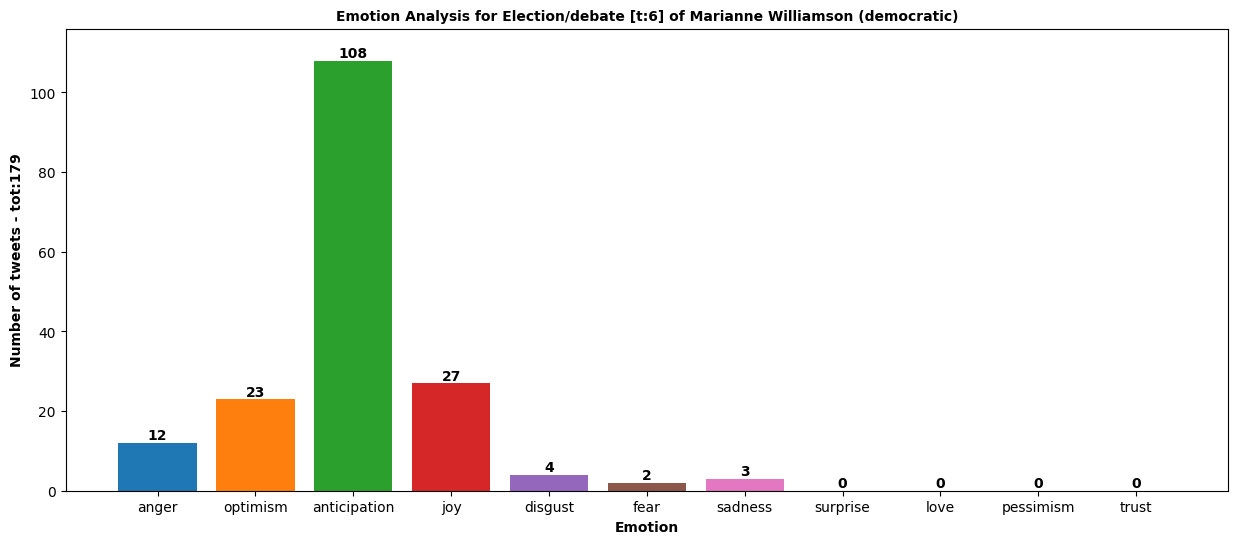

Candidate:  marwilliamson with topic:  7


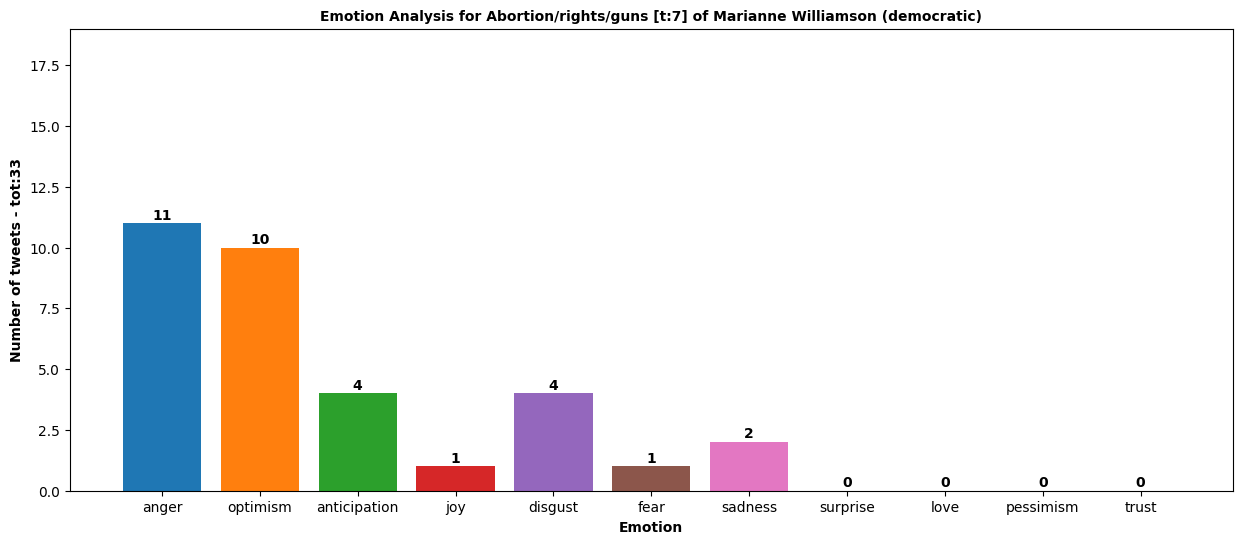

Candidate:  marwilliamson with topic:  8


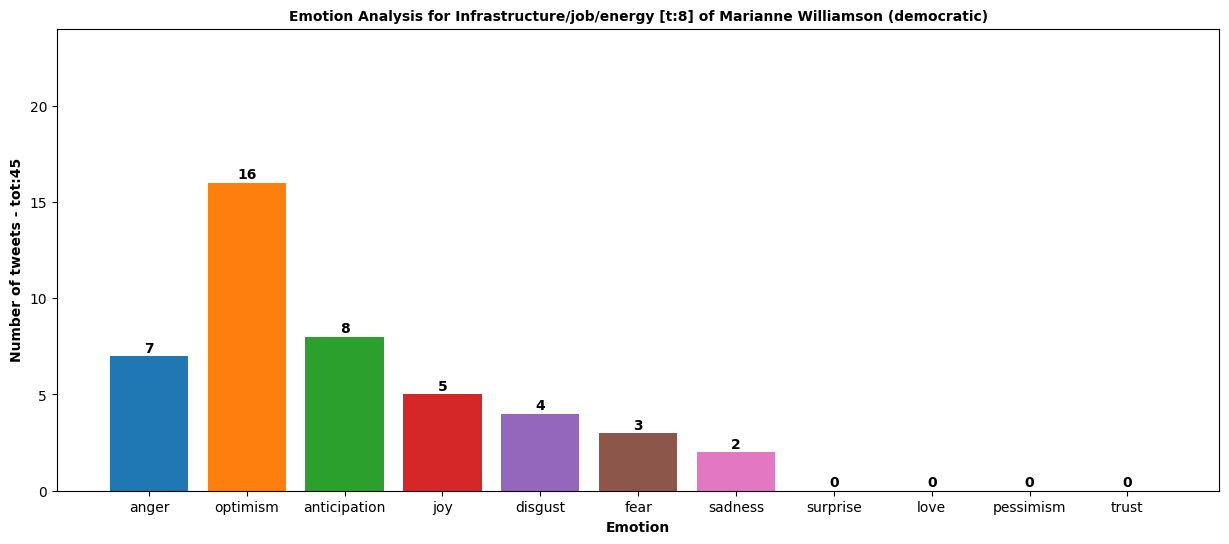

Total tweets for candidate:  671
Candidate:  POTUS with topic:  1


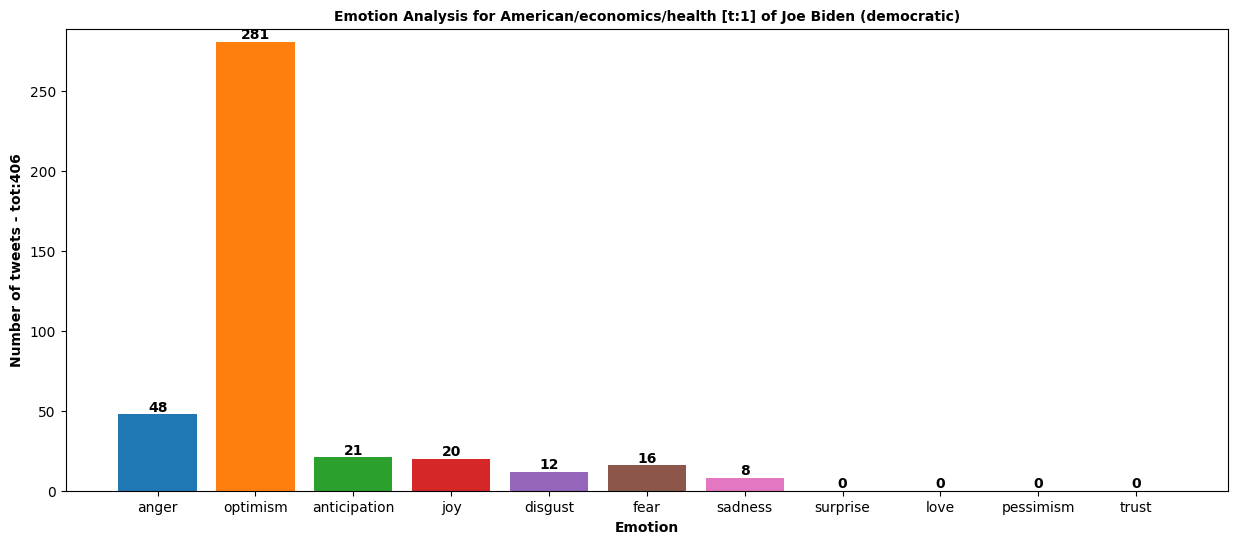

Candidate:  POTUS with topic:  2


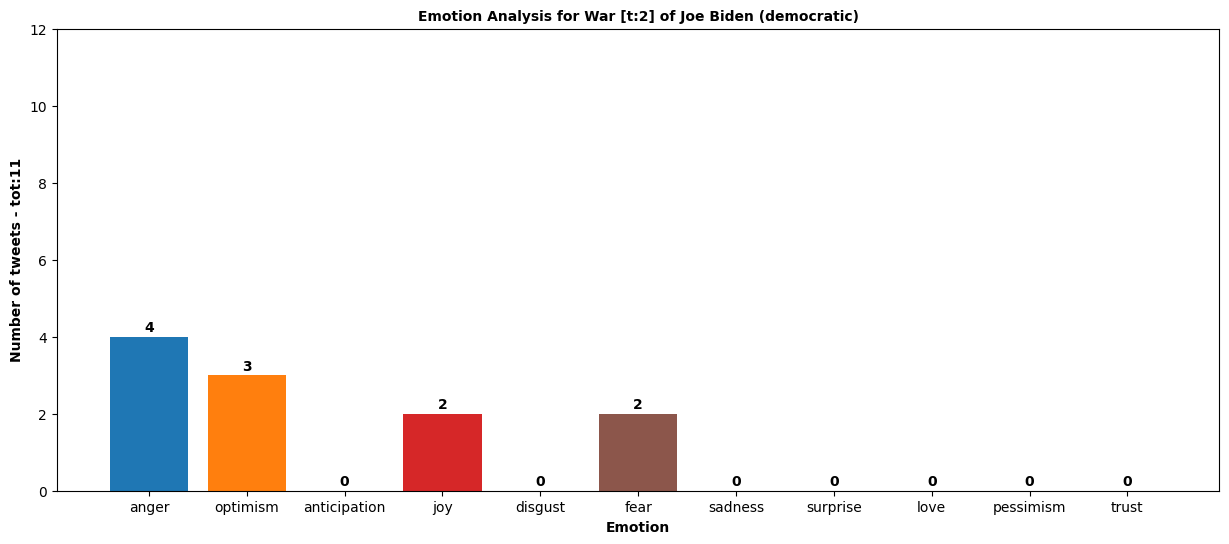

Candidate:  POTUS with topic:  3


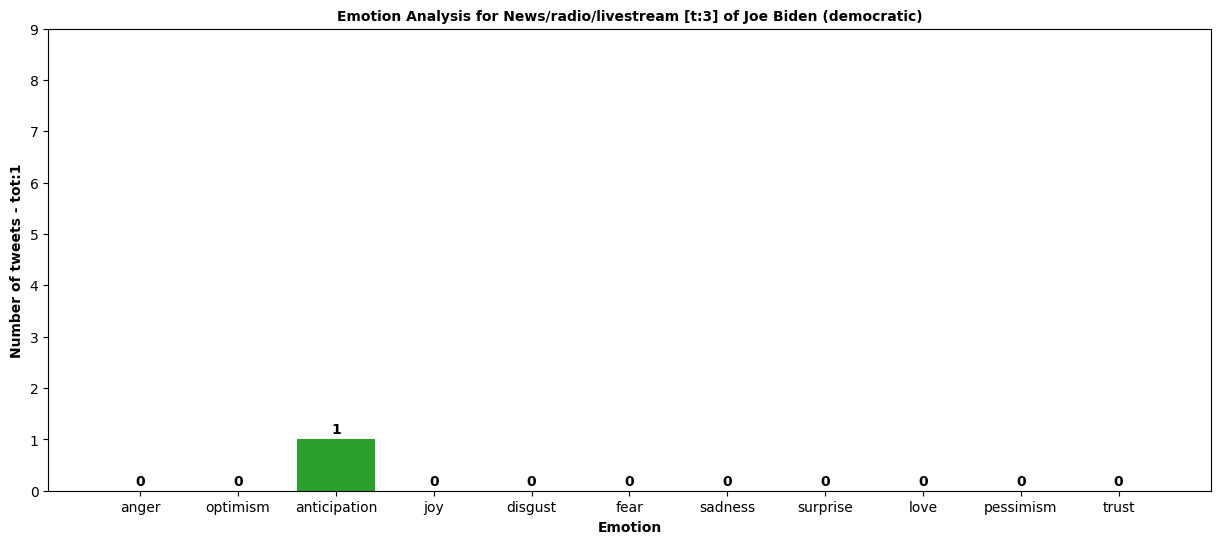

Candidate:  POTUS with topic:  4


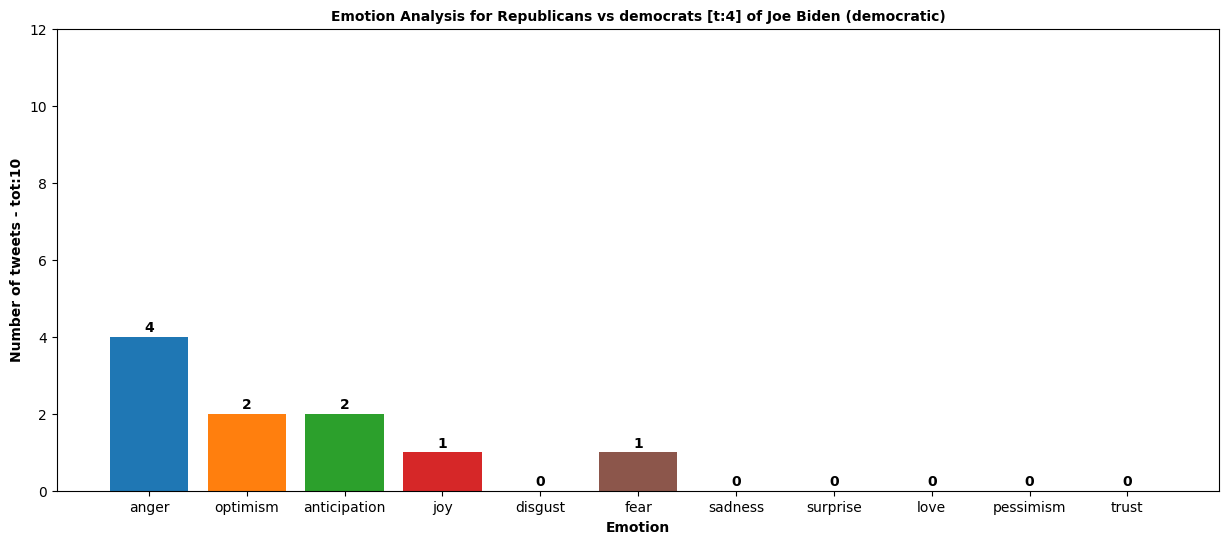

Candidate:  POTUS with topic:  5


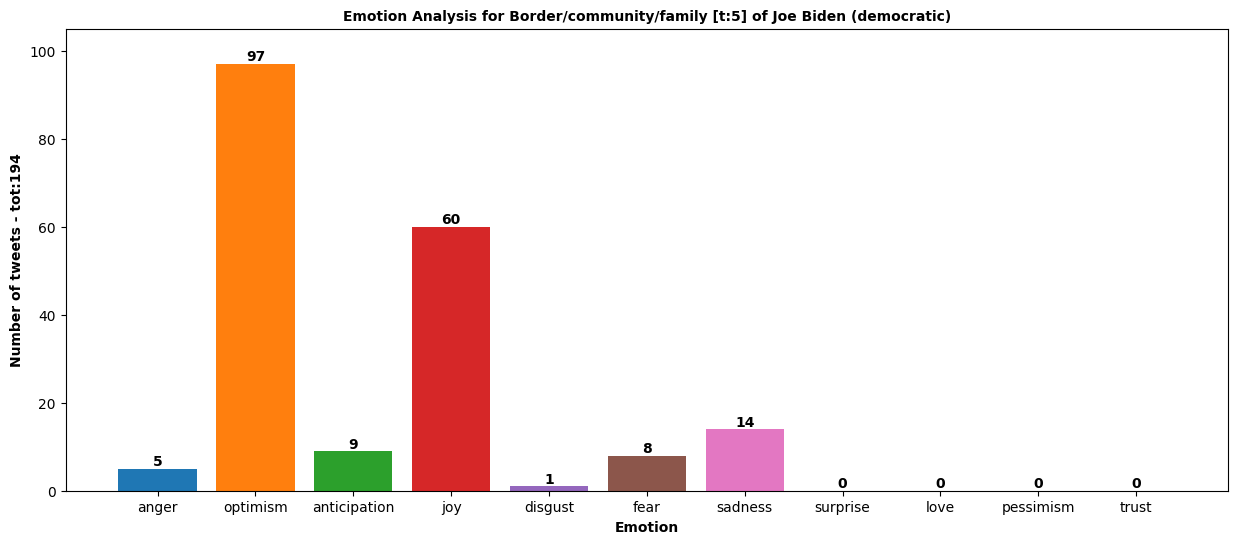

Candidate:  POTUS with topic:  6


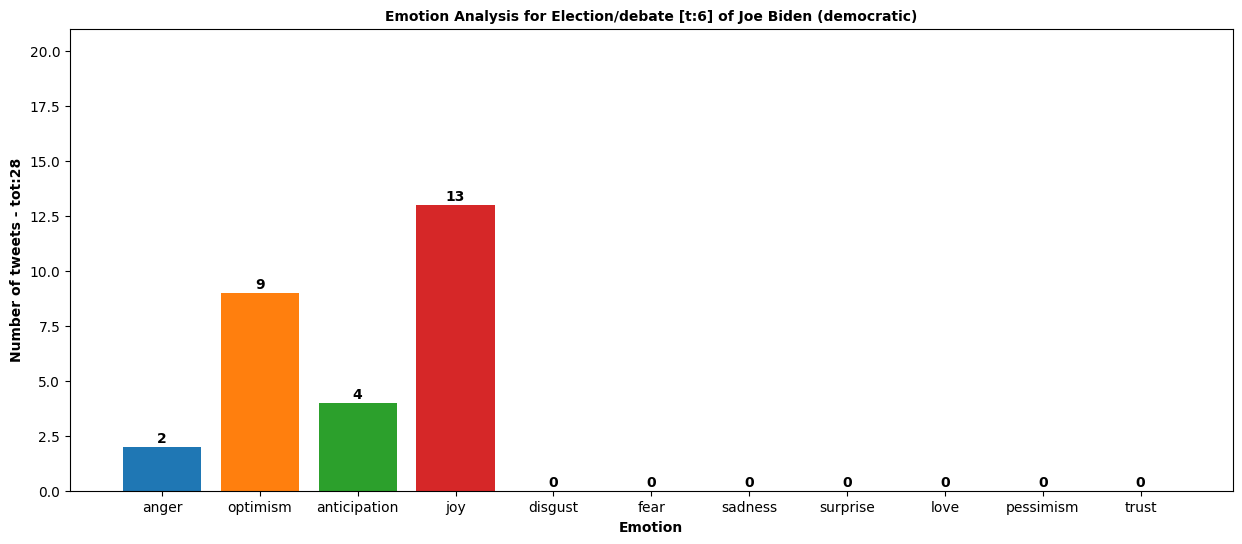

Candidate:  POTUS with topic:  7


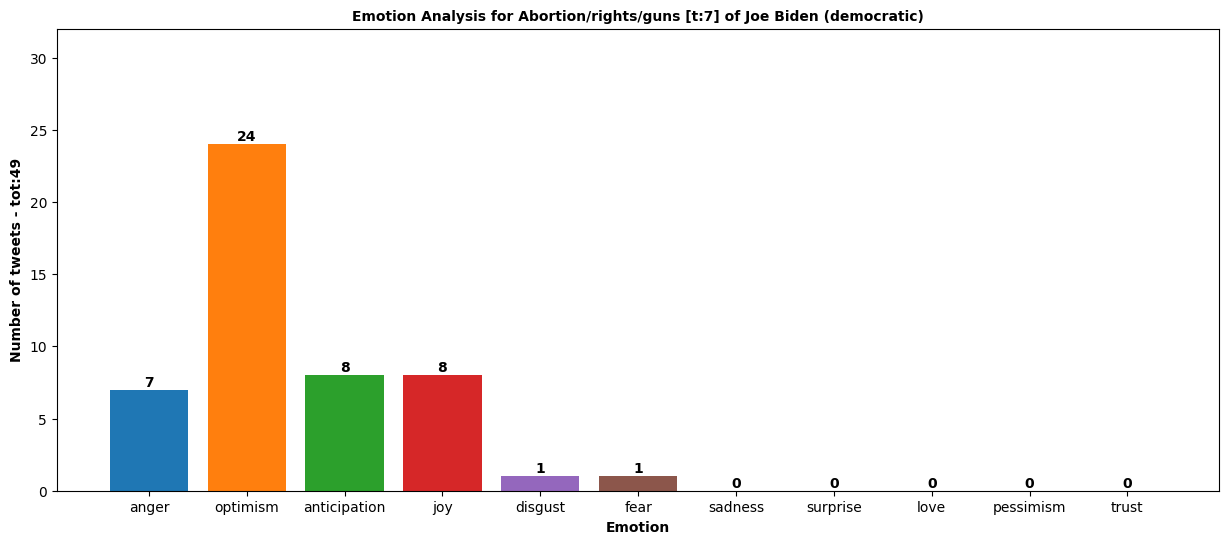

Candidate:  POTUS with topic:  8


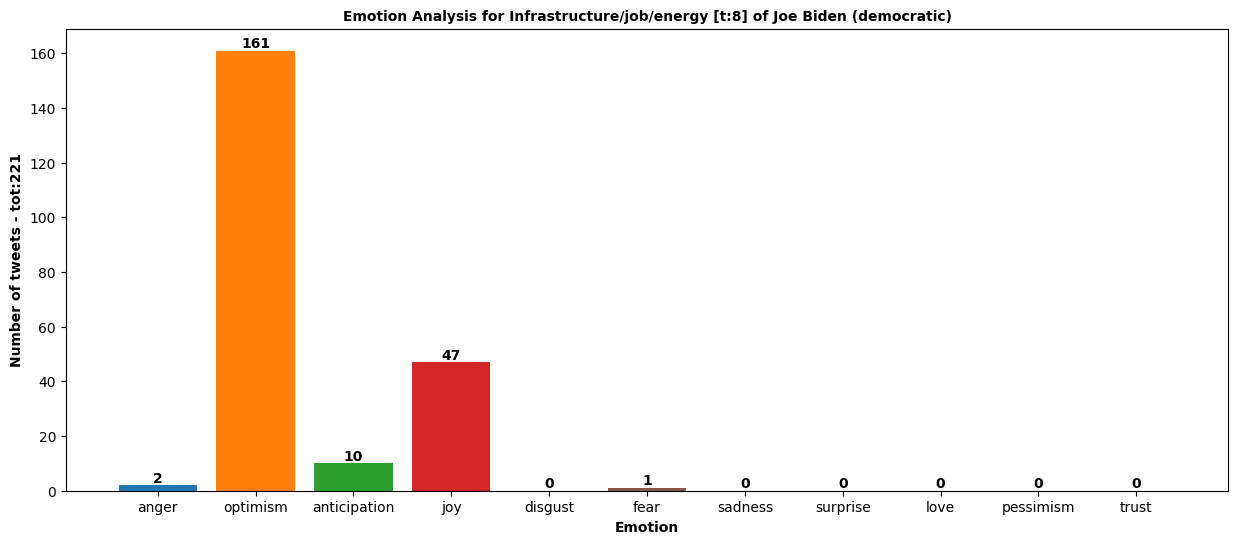

Total tweets for candidate:  920
Candidate:  NikkiHaley with topic:  1


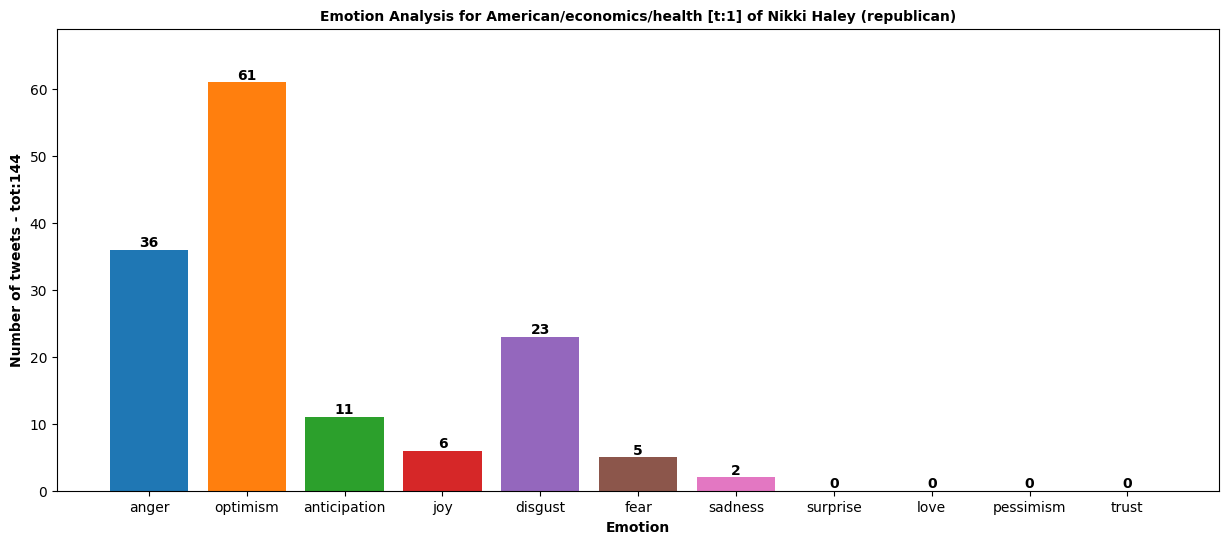

Candidate:  NikkiHaley with topic:  2


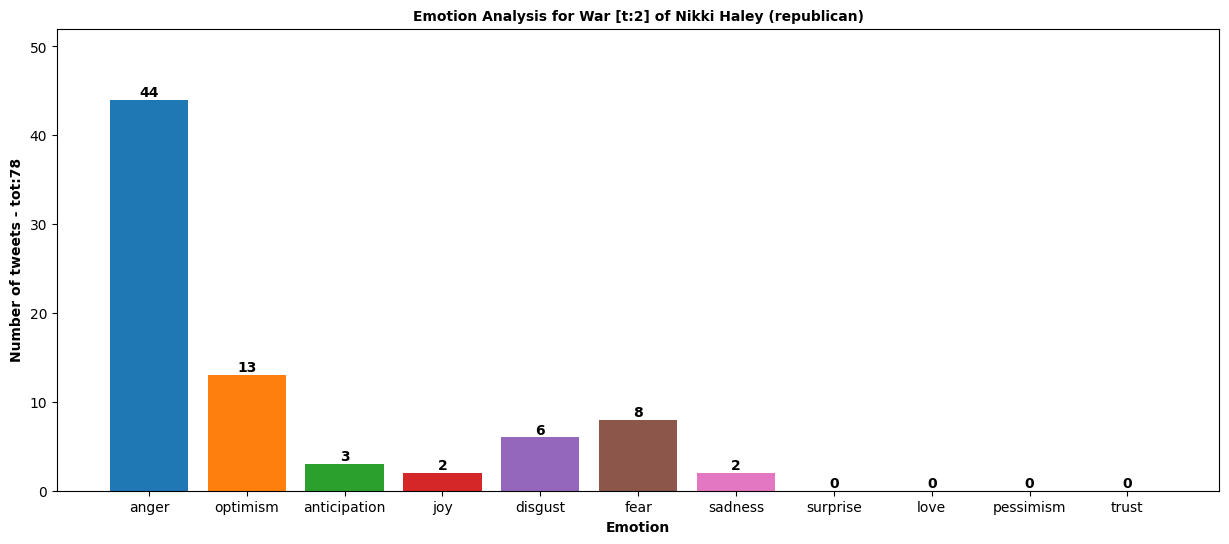

Candidate:  NikkiHaley with topic:  3


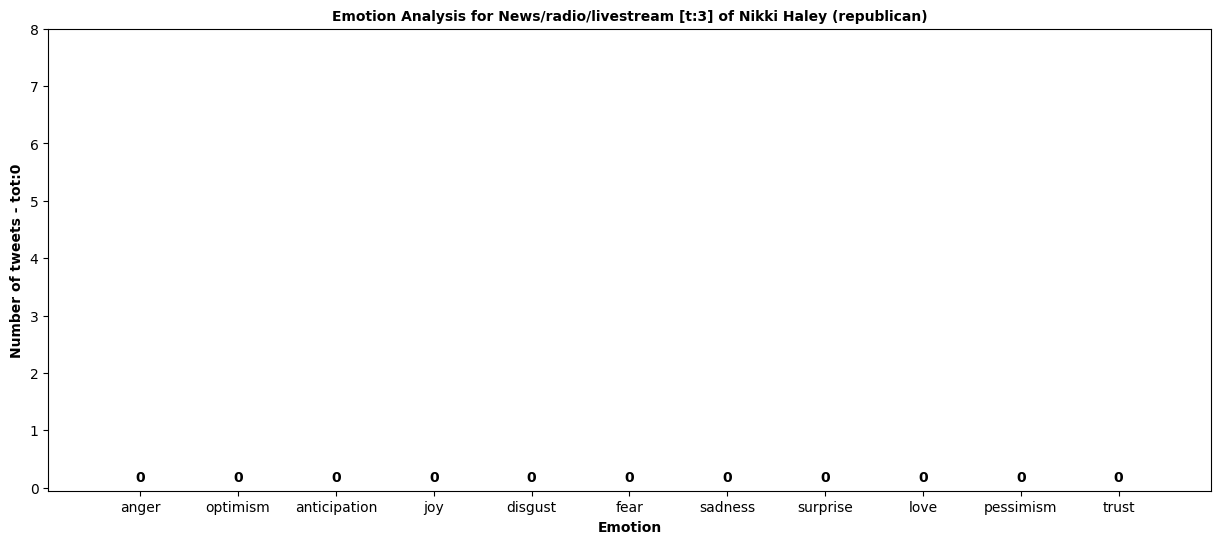

Candidate:  NikkiHaley with topic:  4


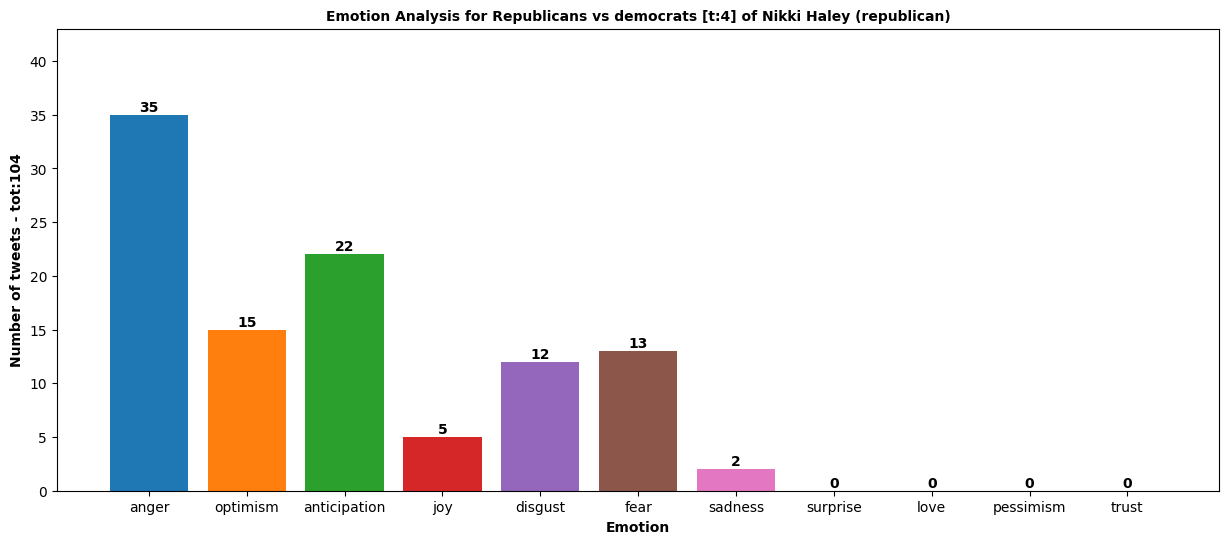

Candidate:  NikkiHaley with topic:  5


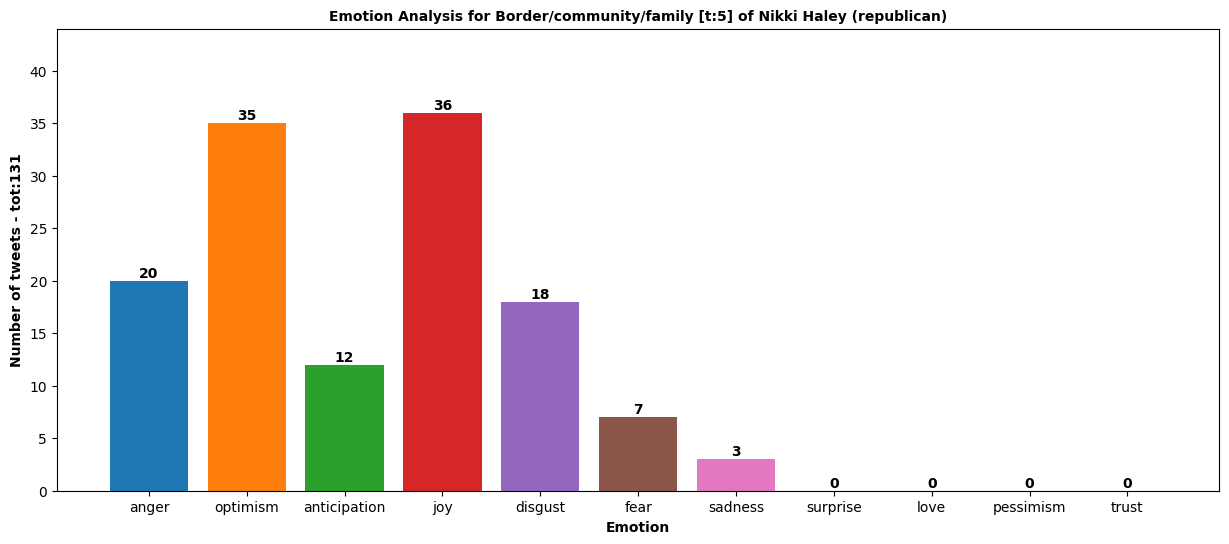

Candidate:  NikkiHaley with topic:  6


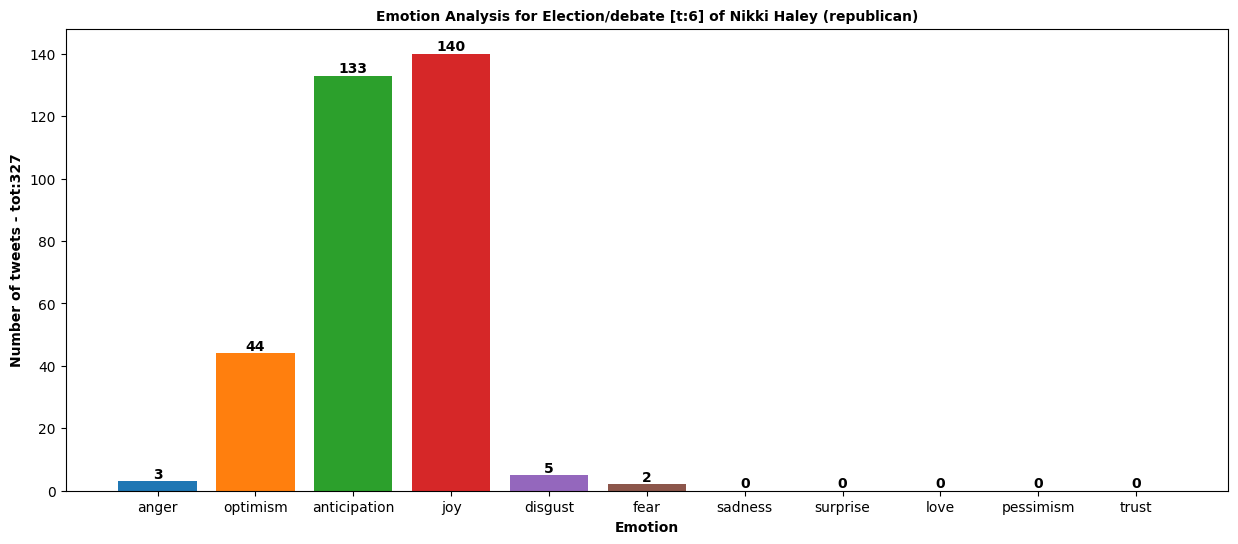

Candidate:  NikkiHaley with topic:  7


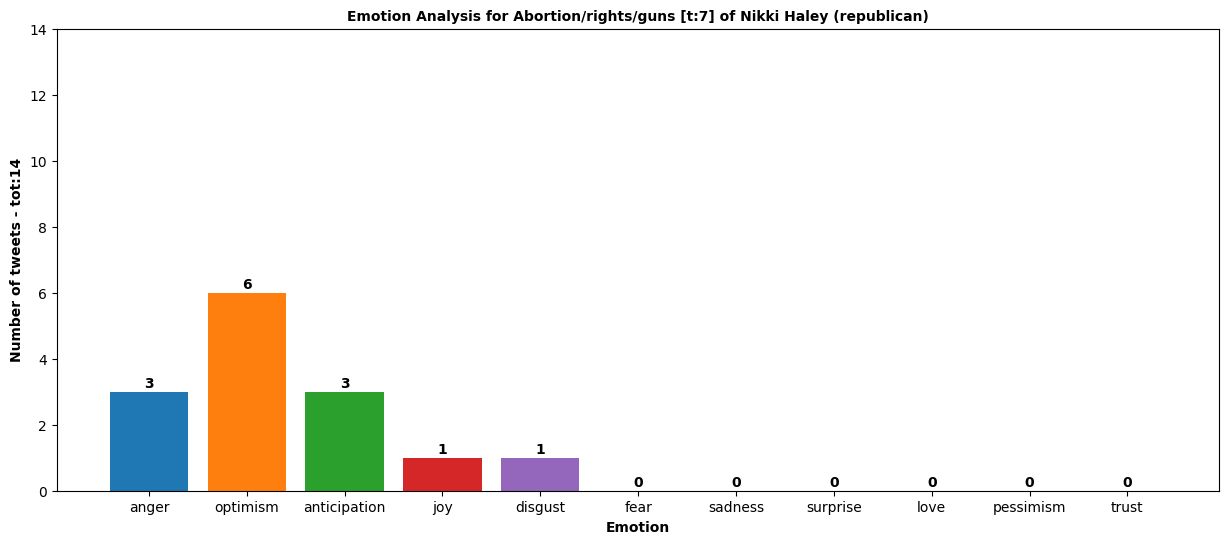

Candidate:  NikkiHaley with topic:  8


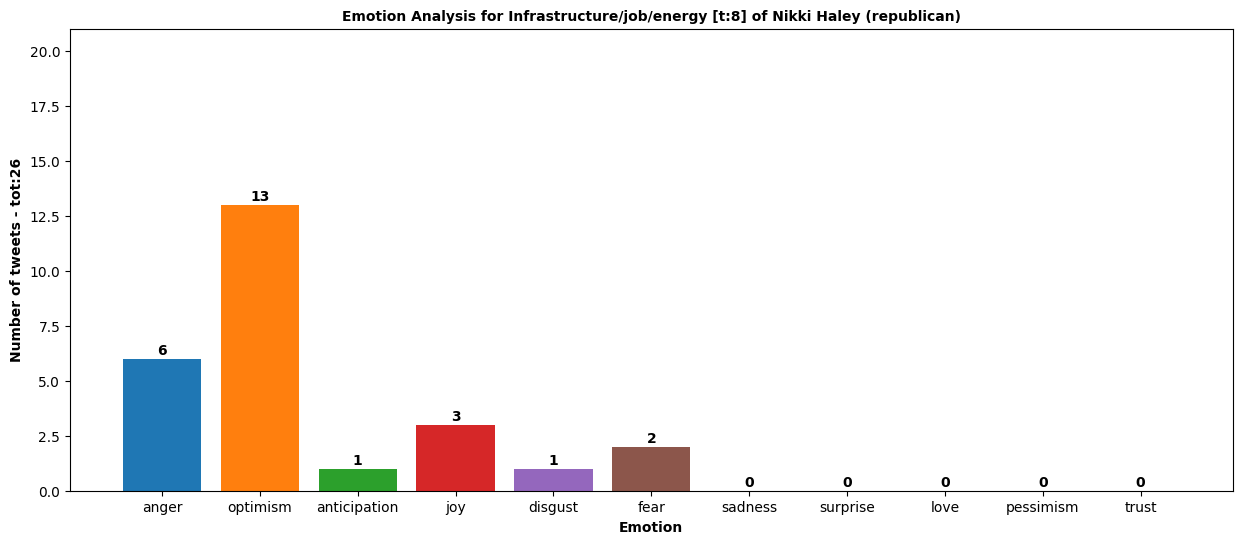

Total tweets for candidate:  824
Candidate:  RonDeSantis with topic:  1


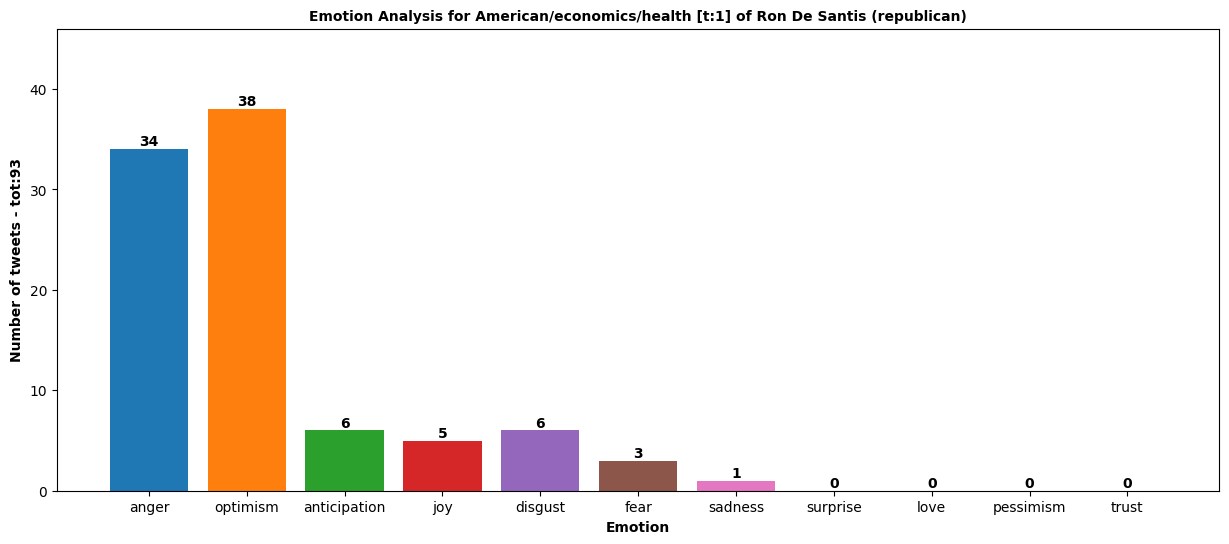

Candidate:  RonDeSantis with topic:  2


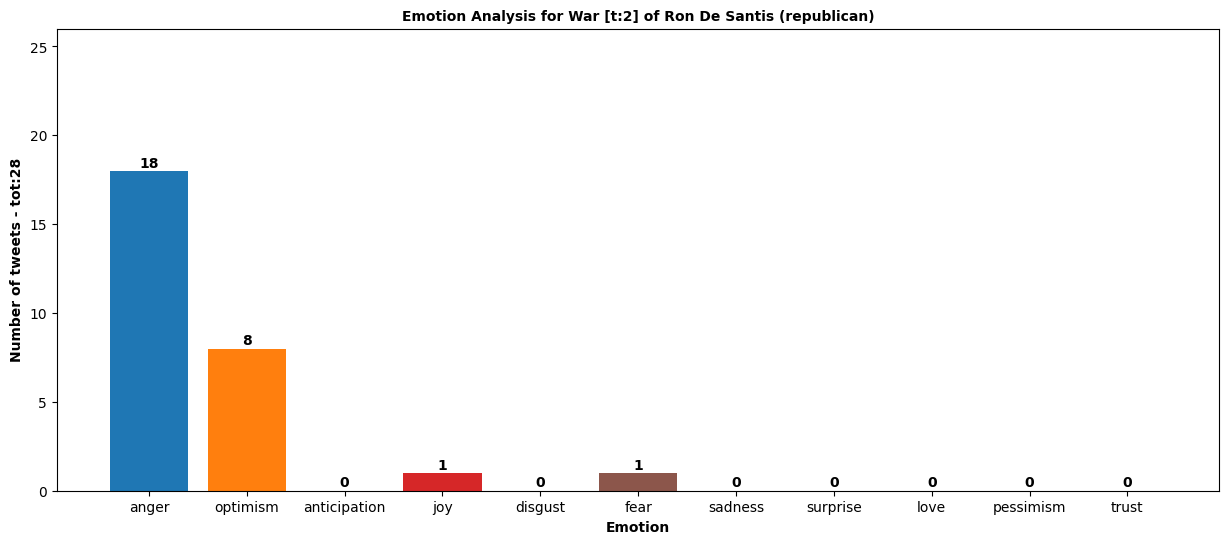

Candidate:  RonDeSantis with topic:  3


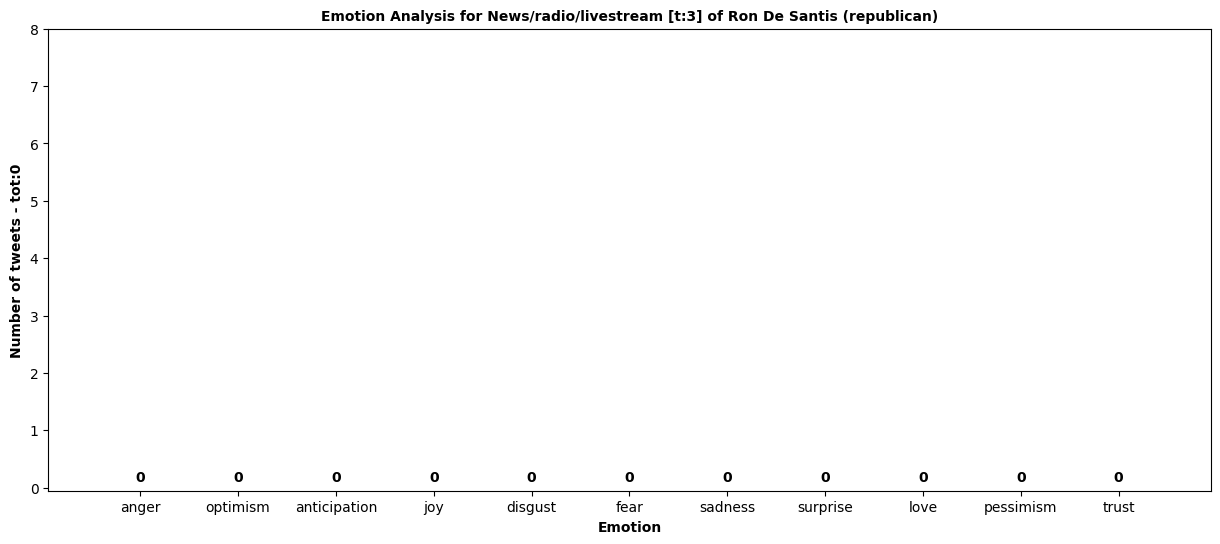

Candidate:  RonDeSantis with topic:  4


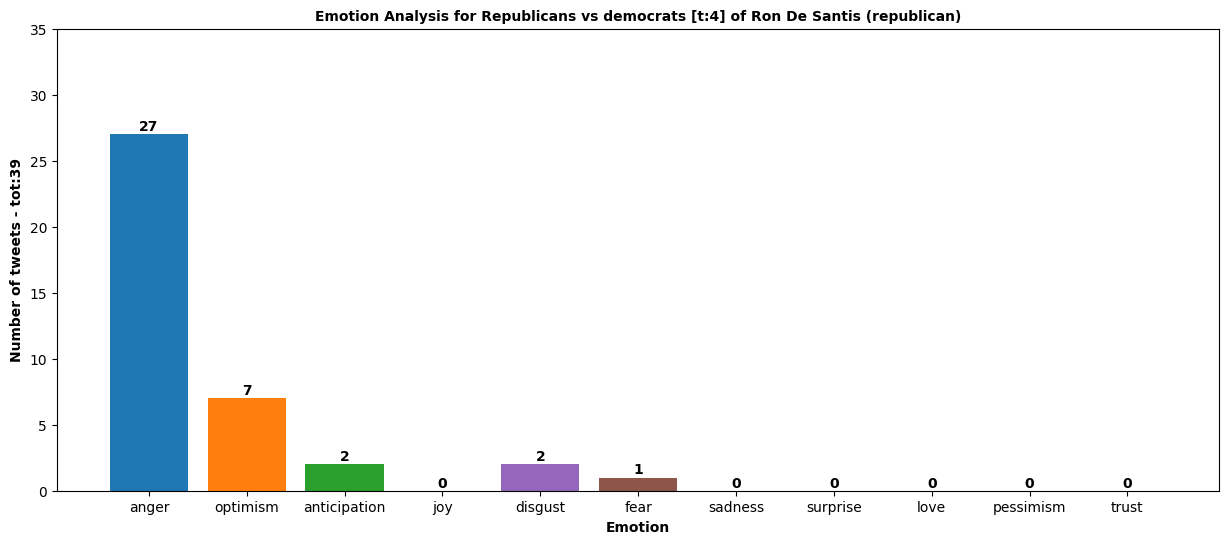

Candidate:  RonDeSantis with topic:  5


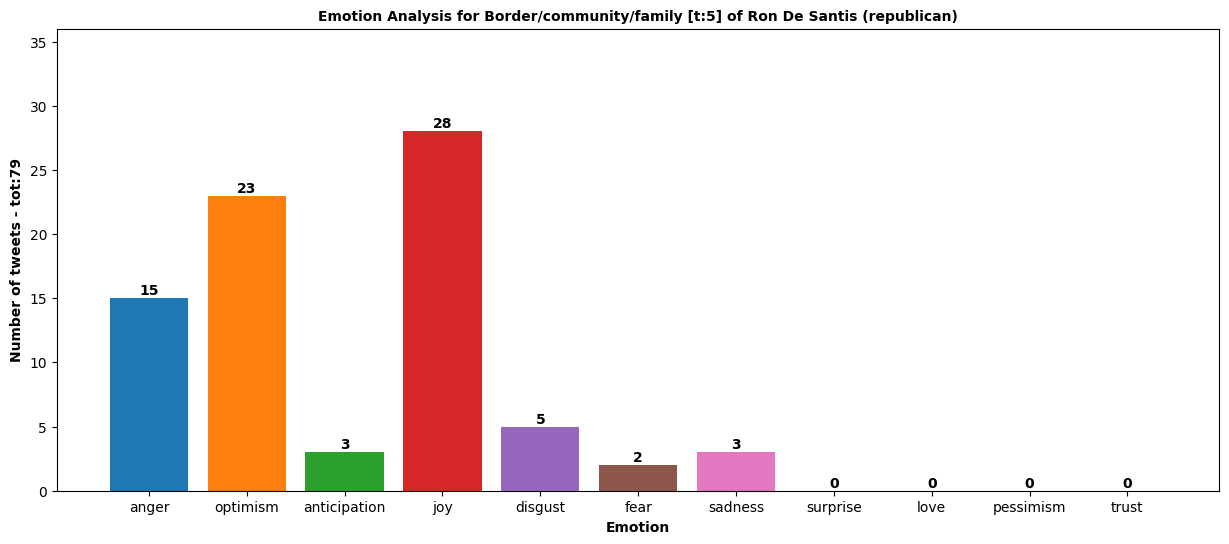

Candidate:  RonDeSantis with topic:  6


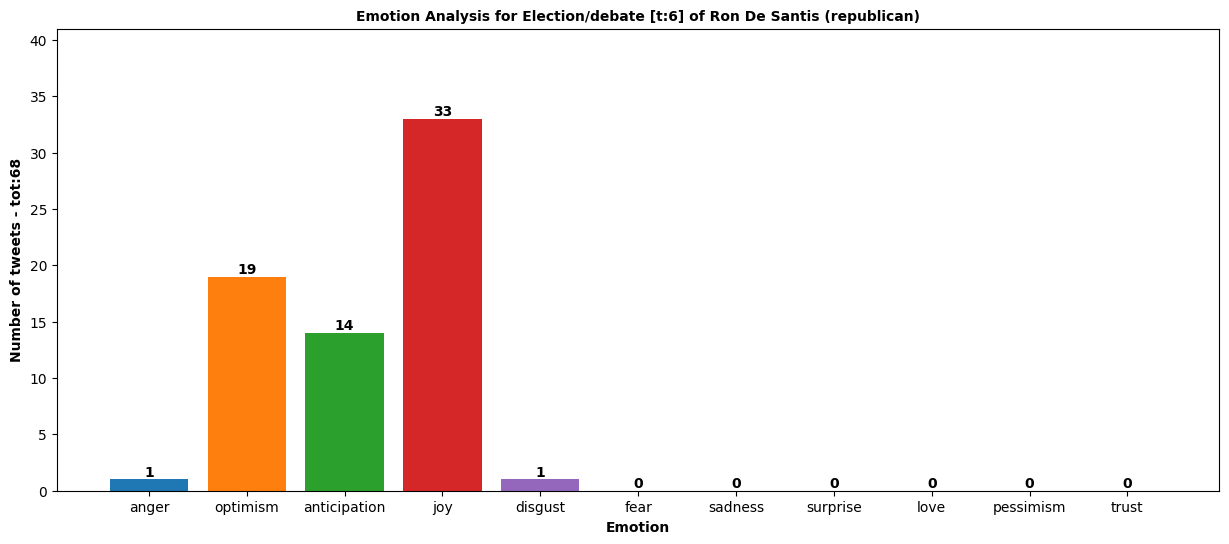

Candidate:  RonDeSantis with topic:  7


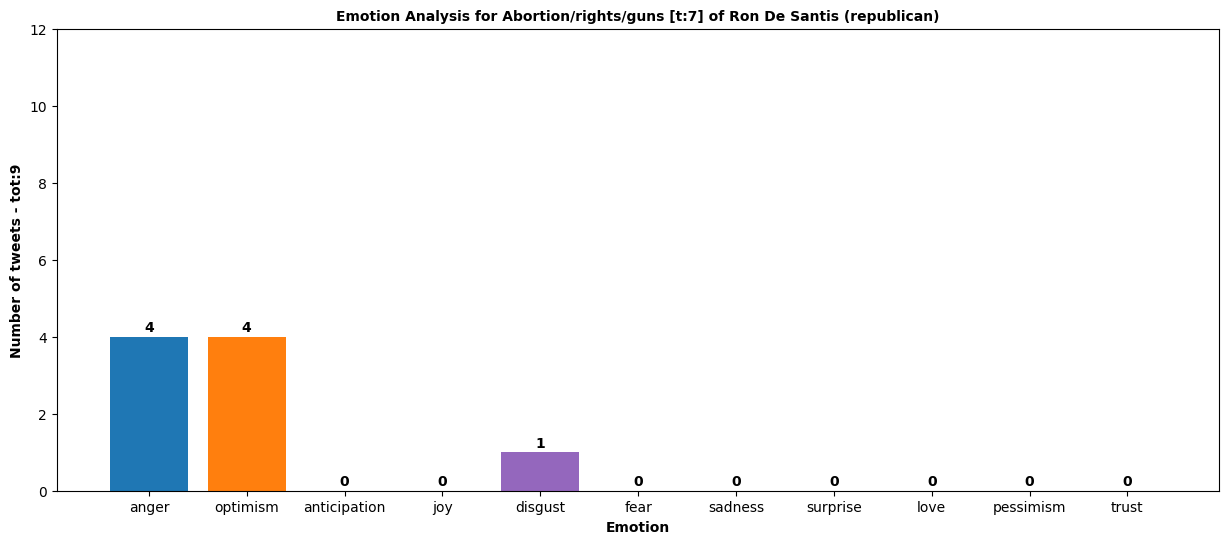

Candidate:  RonDeSantis with topic:  8


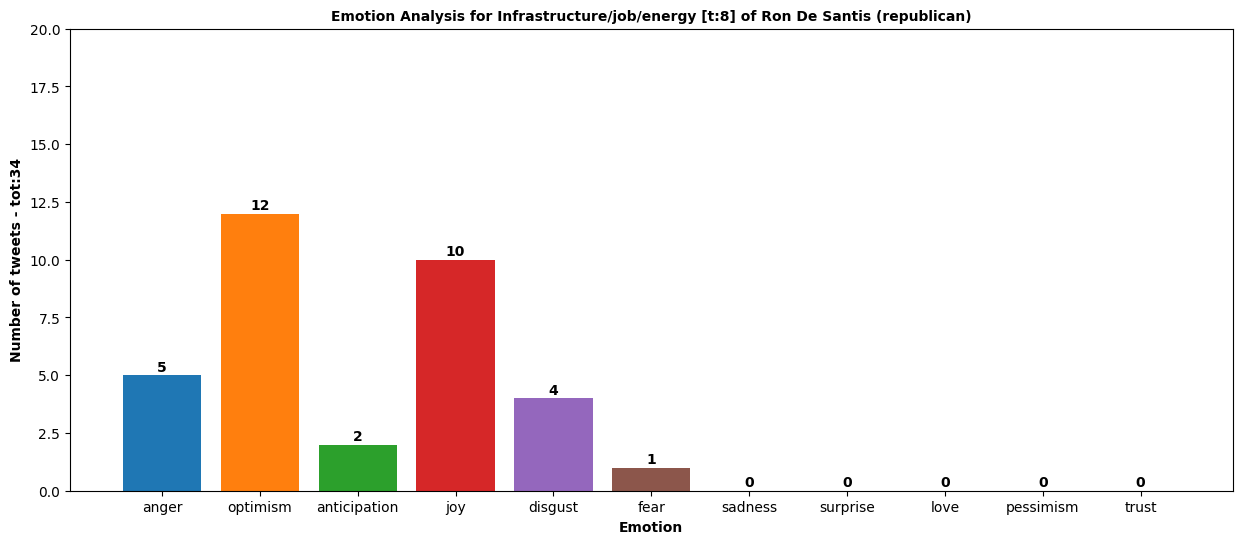

Total tweets for candidate:  350


In [7]:
#^NikkiHaley,[^,]+,1,[^,]+,[^,]+,positive,[^,]+,([^,]+)
#EMOTION ANALYSIS
for candidate in candidates:
    tot_candidate = 0
    for topic in topics:
        print("Candidate: ", candidate, "with topic: ", topic)
        tot = get_chart_emotion(df, topic, topics[topic], candidate, candidates[candidate][0], candidates[candidate][1])
        tot_candidate = tot_candidate + int(tot)
        
    print("Total tweets for candidate: ", tot_candidate)
    

        